In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import gridspec
import matplotlib.animation as manimation
import time
import scipy.io as sio
from random import shuffle
import time
from collections import Counter
import sklearn.cluster as cluster
import time
import hdbscan

#import plotly. as py
#import plotly.graph_objs as go
font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 16}

plt.rc('font', **font)
plt.rc('lines',lw=2)

In [3]:
shorthand = 'WD'; subfolder = 'Permafrost/'

if shorthand == "WD": numstr = '178665';longhand = 'WestDock_IMG_3300022818';expt_name = 'WestDock';
elif shorthand == "SM": numstr = '178664';longhand = 'SagMAT_IMG_3300022816';expt_name = 'SagMAT';
elif shorthand == "FB": numstr = '141108';longhand = 'FranklinBluffs_IMG_3300019790';expt_name = 'FranklinBluffs';


In [5]:
data = pd.read_csv(subfolder+expt_name+'_metadata.table')
data.set_index('Unnamed: 0',inplace=True)
data.columns

Index(['Scaffold ID', 'Scaffold Name', 'Genome ID', 'Genome', 'Gene Count',
       'Sequence Length', 'GC Content', 'Read Depth', 'Lineage Domain',
       'Lineage Phylum', 'Lineage Class', 'Lineage Order', 'Lineage Family',
       'Lineage Genus', 'Lineage Species', 'Lineage Percentage', 'contig_name',
       'nameforreal', 'x_30_a', 'x_30_n', 'x_40_a', 'x_40_n', 'x_50_a',
       'x_50_n', 'x_60_a', 'x_60_n', 'x_70_a', 'x_70_n', 'x_80_a', 'x_80_n',
       'y_30_a', 'y_30_n', 'y_40_a', 'y_40_n', 'y_50_a', 'y_50_n', 'y_60_a',
       'y_60_n', 'y_70_a', 'y_70_n', 'y_80_a', 'y_80_n'],
      dtype='object')

# plot and save tSNEs 

## colored by GC content

In [384]:
################################
### start plotting the tSNEs ###
################################
# color by:  phylum, GC, domain, mini/meta, sampling depth 
# do for all perplexity values
perp = [30,40,50,60,70,80]
normalized = ['a','n']
#### GC ####
for num in perp:
    for norm in normalized:
        xname = 'x_'+str(num)+'_'+norm
        yname = 'y_'+str(num)+'_'+norm
        f = plt.figure()
        f.set_figheight(15)
        f.set_figwidth(18)
        gs = gridspec.GridSpec(1,1)
        ax = f.add_subplot(gs[0,0])
        cm = plt.cm.get_cmap('RdBu_r')

        cax = plt.scatter(data_tSNE[xname],data_tSNE[yname],s=data_tSNE['Sequence Length'].astype(int)/4e2,
                    c=data_tSNE['GC Content'].astype(float),cmap=cm, alpha=.2)
        cbar = f.colorbar(cax)
        #cbar.ax.set_yticklabels(['< -1', '0', '> 1'])
        if norm == 'a':
            nor = 'absolute'
        else:
            nor = 'normalized'
        title = expt_name+'_'+str(num)+'_'+nor+'_GC'
        plt.title(title)
        f.savefig('Permafrost/tSNEs/'+title+'.png')
        f.clf()

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


## colored by domain

In [337]:
perp = [30,40,50,60,70,80]
normalized = ['a','n']
#### Domain ####
vals = data_tSNE['Lineage Domain'].unique();keys = sns.color_palette('Set2',n_colors=len(vals))
lut = dict(zip(vals,keys))
color = data_tSNE['Lineage Domain'].map(lut)
for num in perp:
    for norm in normalized:
        xname = 'x_'+str(num)+'_'+norm
        yname = 'y_'+str(num)+'_'+norm
        f = plt.figure()
        f.set_figheight(15)
        f.set_figwidth(15)
        gs = gridspec.GridSpec(1,1)
        ax = f.add_subplot(gs[0,0])
        plt.scatter(data_tSNE[xname],data_tSNE[yname],s=data_tSNE['Sequence Length'].astype(int)/4e2,
                    c=color, alpha=.2)
        for x,y in lut.items():
            plt.bar(0,0,color=y,label=x,alpha=1)
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles[1:],labels[1:],bbox_to_anchor=(-0.02, 1.02, 1., .102), loc=2,
               ncol=6, mode="expand",fontsize=10)
        if norm == 'a':
            nor = 'absolute'
        else:
            nor = 'normalized'
        title = expt_name+'_'+str(num)+'_'+nor+'_domain'
        plt.title(title)
        f.savefig('Permafrost/tSNEs/'+title+'.png')
        f.clf()

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


## colored by phylum

In [338]:
perp = [30,40,50,60,70,80]
normalized = ['a','n']
#### Phylum ####
vals = list(data_tSNE['Lineage Phylum'].unique());shuffle(vals);keys = sns.color_palette('cubehelix',n_colors=len(vals))
lut = dict(zip(vals,keys))
color = data_tSNE['Lineage Phylum'].map(lut)
for num in perp:
    for norm in normalized:
        xname = 'x_'+str(num)+'_'+norm
        yname = 'y_'+str(num)+'_'+norm
        f = plt.figure()
        f.set_figheight(15)
        f.set_figwidth(15)
        gs = gridspec.GridSpec(1,1)
        ax = f.add_subplot(gs[0,0])
        plt.scatter(data_tSNE[xname],data_tSNE[yname],s=data_tSNE['Sequence Length'].astype(int)/4e2,
                    c=color, alpha=.2)
        for x,y in lut.items():
            plt.bar(0,0,color=y,label=x,alpha=1)
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles[1:],labels[1:],bbox_to_anchor=(-0.02, 1.02, 1., .102), loc=2,
               ncol=6, mode="expand",fontsize=10)
        if norm == 'a':
            nor = 'absolute'
        else:
            nor = 'normalized'
        title = expt_name+'_'+str(num)+'_'+nor+'_phylum'
        plt.title(title)
        f.savefig('Permafrost/tSNEs/'+title+'.png')
        f.clf()

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [339]:
perp = [30,40,50,60,70,80]
normalized = ['a','n']
#### Phylum, only those with >200 contigs ####
a = data_tSNE['Lineage Phylum'].value_counts()
a[a>200];incrowd = list(a[a>200].index)
vals = incrowd;keys = sns.color_palette('cubehelix',n_colors=len(vals))
lut = dict(zip(vals,keys))

incrowd_df = data_tSNE[data_tSNE['Lineage Phylum'].isin(incrowd)]
outcrowd_df = data_tSNE[~data_tSNE['Lineage Phylum'].isin(incrowd)]
color = incrowd_df['Lineage Phylum'].map(lut)
for num in perp:
    for norm in normalized:
        xname = 'x_'+str(num)+'_'+norm
        yname = 'y_'+str(num)+'_'+norm
        f = plt.figure()
        f.set_figheight(15)
        f.set_figwidth(15)
        gs = gridspec.GridSpec(1,1)
        ax = f.add_subplot(gs[0,0])
        plt.scatter(outcrowd_df[xname],outcrowd_df[yname],s=outcrowd_df['Sequence Length'].astype(int)/4e2,
                    c=[0.5,0.5,0.5], alpha=.5)
        plt.scatter(incrowd_df[xname],incrowd_df[yname],s=incrowd_df['Sequence Length'].astype(int)/4e2,
                    c=color, alpha=.5)

        for x,y in lut.items():
            plt.bar(0,0,color=y,label=x,alpha=1)
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles[2:],labels[2:],bbox_to_anchor=(-0.02, 1.02, 1., .102), loc=2,
               ncol=6, mode="expand",fontsize=10)
        if norm == 'a':
            nor = 'absolute'
        else:
            nor = 'normalized'
        title = expt_name+'_'+str(num)+'_'+nor+'_phylum_top'
        plt.title(title)
        f.savefig('Permafrost/tSNEs/'+title+'.png')
        f.clf()

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


## bulk vs. minimetagenomics

In [340]:
perp = [30,40,50,60,70,80]
normalized = ['a','n']
#### Bulk vs. Minimeta ####

bulk = data_tSNE[data_tSNE.index.str.contains('Bulk')]
mini = data_tSNE[~data_tSNE.index.str.contains('Bulk')]

for num in perp:
    for norm in normalized:
        xname = 'x_'+str(num)+'_'+norm
        yname = 'y_'+str(num)+'_'+norm
        f = plt.figure()
        f.set_figheight(15)
        f.set_figwidth(15)
        gs = gridspec.GridSpec(1,1)
        ax = f.add_subplot(gs[0,0])
        plt.scatter(bulk[xname],bulk[yname],s=bulk['Sequence Length'].astype(int)/4e2,
                    c='b', alpha=.2)
        plt.scatter(mini[xname],mini[yname],s=mini['Sequence Length'].astype(int)/4e2,
                    c='g', alpha=.2)
        plt.legend(['bulk','mini'])
        if norm == 'a':
            nor = 'absolute'
        else:
            nor = 'normalized'
        title = expt_name+'_'+str(num)+'_'+nor+'_seqType'
        plt.title(title)
        f.savefig('Permafrost/tSNEs/'+title+'.png')
        f.clf()

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


## color by sampling depth

In [19]:
perp = [30,40,50,60,70,80]
normalized = ['a','n']
#### Bulk depth ####

bulk = data_tSNE[data_tSNE.index.str.contains('Bulk')]
mini = data_tSNE[~data_tSNE.index.str.contains('Bulk')]
depths = list(bulk.index.str[-9:].unique())
if len(depths)>1:
    dep1 = bulk[bulk.index.str.contains(depths[0])]
    dep2 = bulk[bulk.index.str.contains(depths[1])]
    
    for num in perp:
        for norm in normalized:
            xname = 'x_'+str(num)+'_'+norm
            yname = 'y_'+str(num)+'_'+norm
            f = plt.figure()
            f.set_figheight(15)
            f.set_figwidth(15)
            gs = gridspec.GridSpec(1,1)
            ax = f.add_subplot(gs[0,0])
            plt.scatter(dep1[xname],dep1[yname],s=dep1['Sequence Length'].astype(int)/4e2,
                        c='b', alpha=.2)
            plt.scatter(dep2[xname],dep2[yname],s=dep2['Sequence Length'].astype(int)/4e2,
                        c='g', alpha=.2)
            plt.legend([depths[0],depths[1]])
            if norm == 'a':
                nor = 'absolute'
            else:
                nor = 'normalized'
            title = expt_name+'_'+str(num)+'_'+nor+'_bulkDepth'
            plt.title(title)
            f.savefig('Permafrost/tSNEs/'+title+'.png')
            f.clf()
            
        for num in perp:
            for norm in normalized:
                xname = 'x_'+str(num)+'_'+norm
                yname = 'y_'+str(num)+'_'+norm
                f = plt.figure()
                f.set_figheight(15)
                f.set_figwidth(15)
                gs = gridspec.GridSpec(1,1)
                ax = f.add_subplot(gs[0,0])
                plt.scatter(dep2[xname],dep2[yname],s=dep2['Sequence Length'].astype(int)/4e2,
                            c='g', alpha=.2)
                plt.scatter(dep1[xname],dep1[yname],s=dep1['Sequence Length'].astype(int)/4e2,
                            c='b', alpha=.2)
                plt.legend([depths[0],depths[1]])
                if norm == 'a':
                    nor = 'absolute'
                else:
                    nor = 'normalized'
                title = expt_name+'_'+str(num)+'_'+nor+'_bulkDepth_rev'
                plt.title(title)
                f.savefig('Permafrost/tSNEs/'+title+'.png')
                f.clf()

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [12]:
list(bulk.index.str[-9:].unique())

['40cm_Bulk', '55cm_Bulk']

In [10]:
def plot_clusters(df,perplexity,normalized, algorithm, args, kwds,plot_kwds):
    start_time = time.time()
    #plot_kwds = {'alpha' : 0.25,'s' : 30, 'linewidths':0}
    if normalized == "yes":
        nor = '_n'
        no = 'normCoverage'
    else:
        nor = '_a'
        no = 'absCoverage'
    perpl = '_'+str(perplexity)
    xcol = 'x'+perpl+nor
    ycol = 'y'+perpl+nor
    minsize = kwds['min_cluster_size']
    temp = df.loc[:,[xcol,ycol]]
    size = df.loc[:,'Sequence Length']
    
    #print(list(tSNEdata))
    labels = algorithm(*args, **kwds).fit_predict(temp)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    df['DBclusternum'] = labels[0:len(df)] #add cluster numbers to main df
    #meanpos = 
    
    # plotting 
    f,ax = plt.subplots()
    plt.subplot(121)
    plt.scatter(temp[xcol], temp[ycol], s = size.astype(int)/5e2, c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    clustnum = len(np.unique(labels[labels>-1]))
    plt.suptitle(str(clustnum)+' clusters found by {}'.format(str(algorithm.__name__))
                 +' for\n'+expt_name+', '+no+', perplx = '+perpl[1:]+', min clust size = '
                 +str(minsize), fontsize=18)
    #plt.text(-100, 100, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    
    #plt.text(120, 100, str(clustnum)+' clusters found', fontsize=16)
    
    labels2 = labels[0:len(size)]
    
    fraclength = df.iloc[np.where(labels2>-1)[0],5].sum()/df.iloc[:,5].sum()
    fracNotlen = df.iloc[np.where(labels2==-1)[0],5].sum()/df.iloc[:,5].sum()
    fracinClust = len(labels2[labels2>-1])/len(labels2);fracNotClust = len(labels2[labels2==-1])/len(labels2);width=0.7
    inclust = [fracinClust, fraclength]
    outclust = [fracNotClust, fracNotlen]
    
    
    plt.subplot(122)
    ind = [1,2]
    plt.bar(ind,inclust,width=width,alpha=0.6)
    plt.bar(ind,outclust,bottom=inclust,width=width,color='grey',alpha=0.4)
    plt.xticks(ind, ('contigs','length'))
    plt.ylabel('Fraction clustered')
    plt.xlim(0,3)
    f.set_figwidth(17)
    f.set_figheight(8)
    plt.show()
    
    f.savefig(subfolder+'/tSNEs/'+shorthand+'/clustering/'+str(algorithm.__name__)+'_clustering_'+perpl+nor+'MinCluSi_'+str(minsize)+'.png')
    plt.close(f)
    return(labels,df)

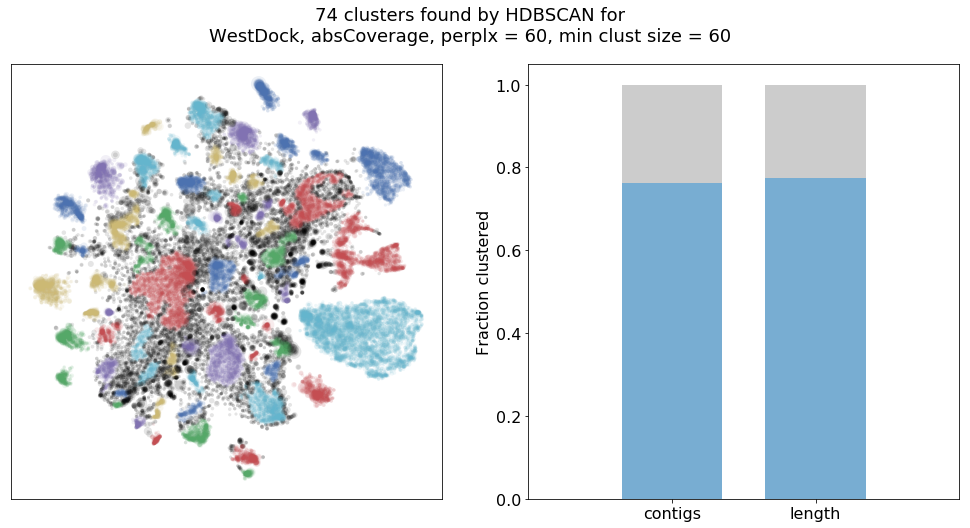

In [11]:
a_hdb, df_hdb  = plot_clusters(data,60,'no', hdbscan.HDBSCAN, (), {'min_cluster_size':60},{'alpha' : 0.1, 'linewidths':0})

In [385]:
clusize = [10,20,30,40,50,60,70,80,100,150,200,250]
for per in perp:
    for si in clusize:
        plot_clusters(data_tSNE,per,'no', hdbscan.HDBSCAN, (), {'min_cluster_size':si},{'alpha' : 0.1, 'linewidths':0})

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control th

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control th

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control th

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control th

In [28]:
### pick clusters and subtract them from the dataset ###
### make new .mat files for tSNE (on the cluster or python here?)
### plot for a specific cluster: GC vs coverage, run HDBscan on that again 

alignment_report[alignment_report['Unnamed: 0'].str.contains('Bulk')]['Unnamed: 0'].str[-9:]

1        15cm_Bulk
5        25cm_Bulk
7        15cm_Bulk
8        25cm_Bulk
9        25cm_Bulk
10       25cm_Bulk
12       15cm_Bulk
15       15cm_Bulk
17       15cm_Bulk
22       25cm_Bulk
24       25cm_Bulk
25       25cm_Bulk
26       15cm_Bulk
27       25cm_Bulk
29       25cm_Bulk
31       25cm_Bulk
35       15cm_Bulk
36       25cm_Bulk
40       15cm_Bulk
43       15cm_Bulk
44       15cm_Bulk
45       25cm_Bulk
46       15cm_Bulk
47       25cm_Bulk
48       25cm_Bulk
51       25cm_Bulk
52       15cm_Bulk
53       25cm_Bulk
54       25cm_Bulk
55       15cm_Bulk
           ...    
65928    25cm_Bulk
65929    25cm_Bulk
65930    25cm_Bulk
65932    25cm_Bulk
65936    15cm_Bulk
65937    25cm_Bulk
65939    25cm_Bulk
65941    15cm_Bulk
65943    15cm_Bulk
65947    25cm_Bulk
65948    25cm_Bulk
65950    25cm_Bulk
65953    25cm_Bulk
65954    25cm_Bulk
65956    15cm_Bulk
65958    25cm_Bulk
65962    15cm_Bulk
65963    15cm_Bulk
65964    25cm_Bulk
65965    25cm_Bulk
65966    15cm_Bulk
65967    25c

In [40]:
### load alignment report files and determine contig-chip origin ###
alignment_report = pd.read_csv('/home/datastorage/ASSEMBLY_DATA/Permafrost'+expt_name+'/Combined_Analysis/super_contigs.Permafrost'+expt_name+'.alignment_report.txt','\t')
alignment_report_nor = pd.read_csv('/home/datastorage/ASSEMBLY_DATA/Permafrost'+expt_name+'/Combined_Analysis/super_contigs.Permafrost'+expt_name+'.normalized_alignment_report.txt','\t')

# replace column names by human interpretable names (i.e. well&chip# + sampling depth)
demux = pd.read_csv('AssemblyData/Permafrost/'+expt_name+'_demux.csv','\t')
chip = list(demux['Folder Name'].str[0:6].unique())
chipname  = ['chip'+str(i+1)+'_' for i in range(0,len(chip))]
demux['chip'] = [chipname[chip.index(s)] for s in demux['Folder Name'].str[0:6]]
demux['well'] = [s[-3:] if (len(s)>20) else 'NC_'+s[-3:] for s in demux['Sample Name']]

if shorthand=='WD': # WestDock only has 1 sampling depth    
    demux['label'] = demux['chip']+demux['well']
elif shorthand=='SM': # the others have 2 depths, 2 chips per sample
    demux['depth'] = [s[17:19] if (len(s)>25) else 'nc' for s in demux['Sample Name']]
    demux['label'] = demux['chip']+demux['well']+'_'+demux['depth']
    coldict = {'SegMat_25cm_Bulk':'SagMAT_25cm_Bulk','SegMat_15cm_Bulk':'SagMAT_15cm_Bulk'}
    alignment_report = alignment_report.rename(columns=coldict)
    alignment_report_nor = alignment_report_nor.rename(columns=coldict)
elif shorthand=='FB': # the others have 2 depths, 2 chips per sample
    demux['depth'] = [s[19:21] if (len(s)>25) else 'nc' for s in demux['Sample Name']]
    demux['label'] = demux['chip']+demux['well']+'_'+demux['depth']
    
    
coldict = dict(zip(list(demux['Folder Name']),list(demux['label'])))
alignment_report = alignment_report.rename(columns=coldict)
alignment_report_nor = alignment_report_nor.rename(columns=coldict)

In [93]:
# split into depth-associated dfs
depth_15 = alignment_report_nor.T[alignment_report_nor.T.index.str[-2:]=='40'].T
depth_25 = alignment_report_nor.T[alignment_report_nor.T.index.str[-2:]=='55'].T
depth_15_a = alignment_report.T[alignment_report.T.index.str[-2:]=='40'].T
depth_25_a = alignment_report.T[alignment_report.T.index.str[-2:]=='55'].T

In [94]:
depth_15_a.sum().sum()


143616601.0

In [95]:
depth_25_a.sum().sum()

356829415.0

In [87]:
ali

19

In [92]:
demux

,Sample Name,Nextera Barcode,Nextera Indeces,Folder Name,chip,well,depth,label
0,Permafrost_Franklin40_1773016145_C03_wellA01,NexteraBarcode N701-S502,TAAGGCGA-ATAGAGAG,IL1811-N701-S502,chip1_,A01,40,chip1_A01_40
1,Permafrost_Franklin40_1773016145_C02_wellA02,NexteraBarcode N702-S502,CGTACTAG-ATAGAGAG,IL1811-N702-S502,chip1_,A02,40,chip1_A02_40
2,Permafrost_Franklin40_1773016145_C01_wellA03,NexteraBarcode N703-S502,AGGCAGAA-ATAGAGAG,IL1811-N703-S502,chip1_,A03,40,chip1_A03_40
3,negative_controlA04,NexteraBarcode N704-S502,TCCTGAGC-ATAGAGAG,IL1811-N704-S502,chip1_,NC_A04,nc,chip1_NC_A04_nc
4,Permafrost_Franklin40_1773016145_C50_wellA05,NexteraBarcode N705-S502,GGACTCCT-ATAGAGAG,IL1811-N705-S502,chip1_,A05,40,chip1_A05_40
5,Permafrost_Franklin40_1773016145_C51_wellA06,NexteraBarcode N706-S502,TAGGCATG-ATAGAGAG,IL1811-N706-S502,chip1_,A06,40,chip1_A06_40
6,Permafrost_Franklin40_1773016145_C06_wellA07,NexteraBarcode N707-S502,CTCTCTAC-ATAGAGAG,IL1811-N707-S502,chip1_,A07,40,chip1_A07_40
7,Permafrost_Franklin40_1773016145_C05_wellA08,NexteraBarcode N710-S502,CGAGGCTG-ATAGAGAG,IL1811-N710-S502,chip1_,A08,40,chip1_A08_40
8,Permafrost_Franklin40_1773016145_C04_wellA09,NexteraBarcode N711-S502,AAGAGGCA-ATAGAGAG,IL1811-N711-S502,chip1_,A09,40,chip1_A09_40
9,Permafrost_Franklin40_1773016145_C52_wellA10,NexteraBarcode N712-S502,GTAGAGGA-ATAGAGAG,IL1811-N712-S502,chip1_,A10,40,chip1_A10_40


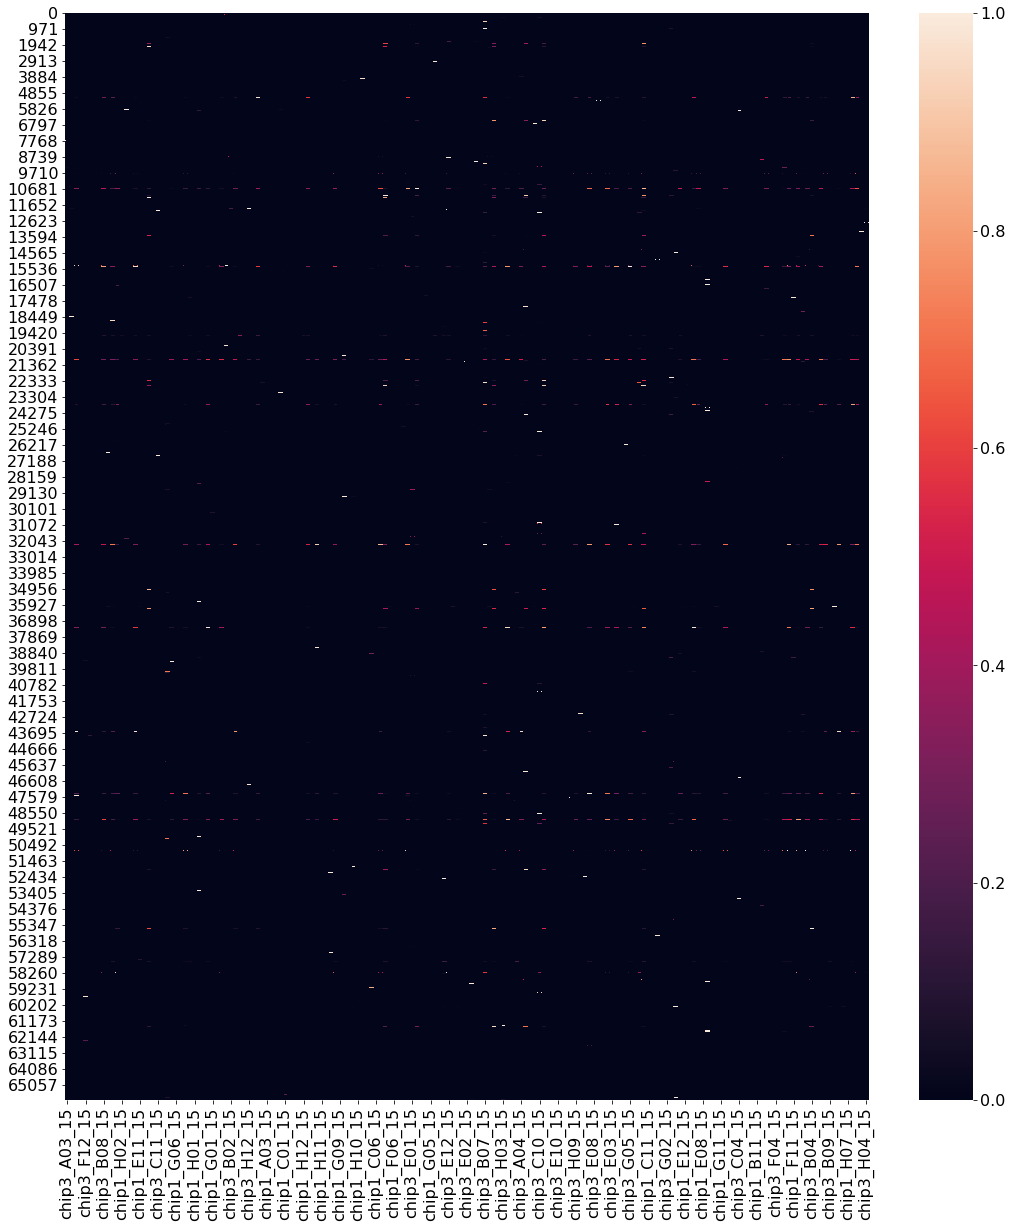

In [68]:
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(20)
sns.heatmap(depth_15.astype(float))
plt.show()

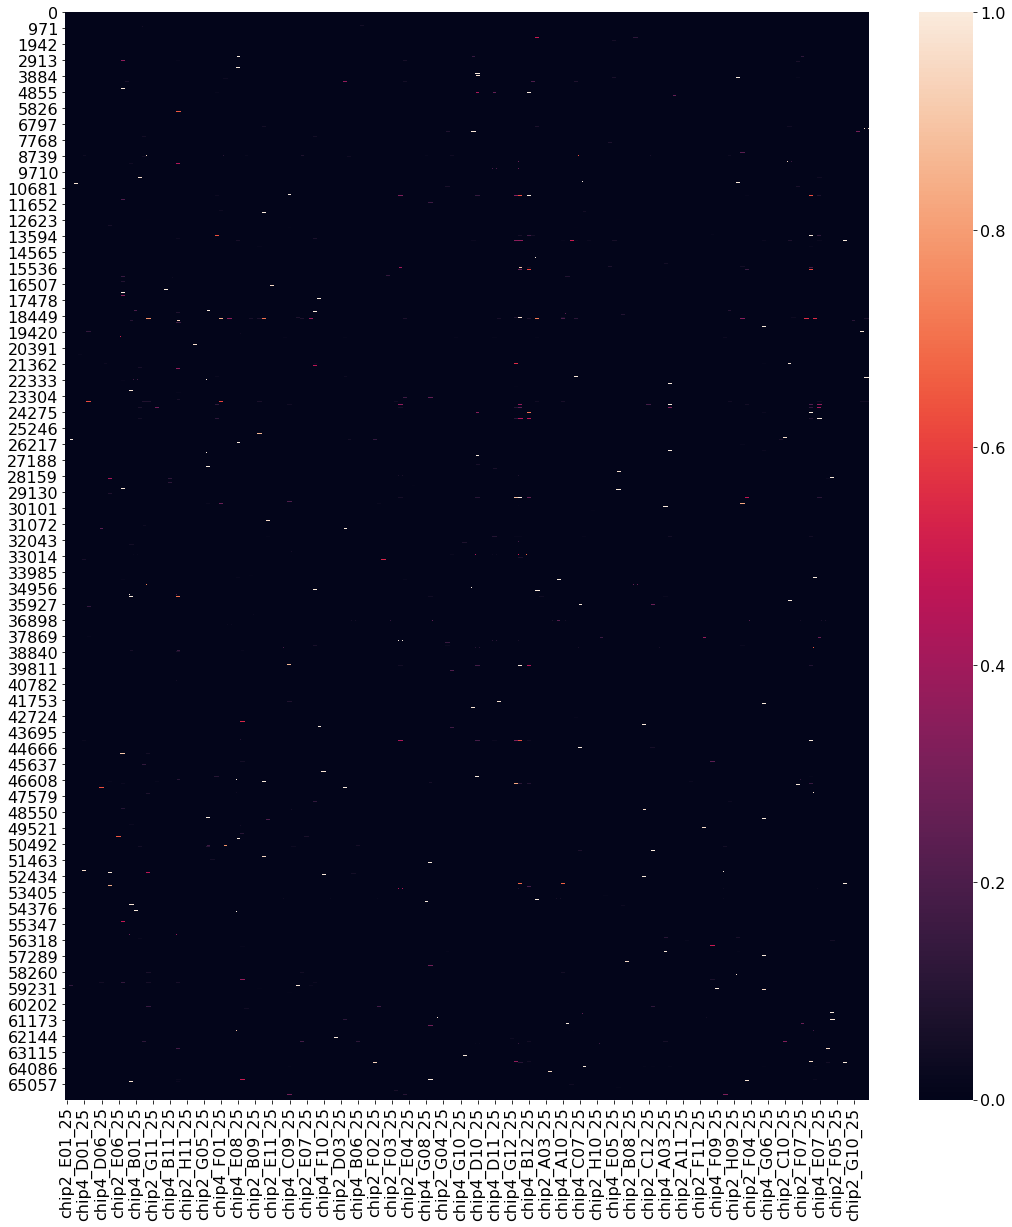

In [69]:
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(20)
sns.heatmap(depth_25.astype(float))
plt.show()

In [61]:
len(alignment_report_nor.T)

368

In [63]:
len(depth_15.T)+len(depth_25.T)

365

In [66]:
depth_15.isnull().sum().sum()

0

In [305]:
len(data_tSNE[data_tSNE.index.str.contains('Bulk')])/len(data_tSNE)
import HTSeq
from Bio import SeqIO
input_file = '/home/datastorage/ASSEMBLY_DATA/Permafrost'+expt_name+'/Combined_Analysis/subsample_contigs.Permafrost'+expt_name+'.fasta'
"""k=0
for s in HTSeq.FastaReader(input_file):
    if k==0:
        headers = [s.name]
        k+=1
    else:
        headers = headers.append(s.name)"""

a = SeqIO.to_dict(SeqIO.parse(input_file,'fasta'))
minimetalist = list(a.keys())

In [310]:
data_tSNE[data_tSNE.index.isin(minimetalist)]
minimetalist
data_tSNE.index[0]

'SuperContig_k91_117_flag=1_multi=8.0000_len=5356_WestDock5_Bulk'

In [4]:

crisprs = list(csv.reader(open('/home/datastorage/Obsidian_annotationData_5kb/'+shorthand+'/IMG Data/'+numstr+'.assembled.crisprs')))
alignment_report = pd.read_table(expt_name+'/super_contigs.'+expt_name+'.alignment_report.txt')
demux = pd.read_csv(expt_name+'_demux.csv')
demux['Sample Name'], demux['Well_num'] = demux['Sample Name'].str.split('ll').str
tsne_k4 = list(open(expt_name+'_tSNE_k4.txt'))
tsne_k5 = list(open(expt_name+'_tSNE_k5.txt'))

def fromasciitodf(inputarg):
    dat = []
    for i in inputarg:
        dt = i.split()
        daaat = [float(dt[0]),float(dt[1])]
        dat.append(daaat)
    tsne = pd.DataFrame.from_records(dat,columns=['x','y'])
    return(tsne)

tSNE_k4 = fromasciitodf(tsne_k4)
tSNE_k5 = fromasciitodf(tsne_k5)

In [5]:
#load data
reads = list(csv.reader(open('N50/'+shorthand+'_minimetaN50.txt'),delimiter = ','))
N50df = pd.DataFrame.from_records(reads,columns=['barcode','N50'])
N50df['N50'] = N50df['N50'].astype(float)

barcodenames = list(N50df['barcode']);
demux['N50'] = 0
#add to appropriate row in demux
for i in range(0,len(barcodenames)):
    idx = demux.loc[demux['Folder Name'] == barcodenames[i]]
    demux.iloc[idx.index[0],6] = N50df.iloc[i,1]

# get the Fragment analysis [DNA] and turn into 8*12 df
cols = [0,1,2,3,4,5,6,7,8,9,10,11,12];rows = ['A','B','C','D','E','F','G','H']
chip_conc = pd.DataFrame(columns=cols)
chip_N50 =  pd.DataFrame(columns=cols)
chip_conc.iloc[:,0] = rows;
chip_N50.iloc[:,0] = rows;j=0;names = list(demux['Well_num'])
for i in range(0,len(names)):
    if 'A' in names[i]:
        #print('yes')
        chip_conc.iloc[0,int(names[i][1:3])] = demux.iloc[i,4]
        chip_N50.iloc[0,int(names[i][1:3])] = demux.iloc[i,6] 
    elif 'B' in names[i]:
        #print('maybe')  
        chip_conc.iloc[1,int(names[i][1:3])] = demux.iloc[i,4]
        chip_N50.iloc[1,int(names[i][1:3])] = demux.iloc[i,6] 
    elif 'C' in names[i]:
        chip_conc.iloc[2,int(names[i][1:3])] = demux.iloc[i,4]
        chip_N50.iloc[2,int(names[i][1:3])] = demux.iloc[i,6] 
    elif 'D' in names[i]:
        chip_conc.iloc[3,int(names[i][1:3])] = demux.iloc[i,4]
        chip_N50.iloc[3,int(names[i][1:3])] = demux.iloc[i,6] 
    elif 'E' in names[i]:
        chip_conc.iloc[4,int(names[i][1:3])] = demux.iloc[i,4]
        chip_N50.iloc[4,int(names[i][1:3])] = demux.iloc[i,6] 
    elif 'F' in names[i]:
        chip_conc.iloc[5,int(names[i][1:3])] = demux.iloc[i,4]
        chip_N50.iloc[5,int(names[i][1:3])] = demux.iloc[i,6] 
    elif 'G' in names[i]:
        chip_conc.iloc[6,int(names[i][1:3])] = demux.iloc[i,4]
        chip_N50.iloc[6,int(names[i][1:3])] = demux.iloc[i,6] 
    elif 'H' in names[i]:
        chip_conc.iloc[7,int(names[i][1:3])] = demux.iloc[i,4]
        chip_N50.iloc[7,int(names[i][1:3])] = demux.iloc[i,6] 


TypeError: argument of type 'float' is not iterable

In [6]:
# this processes the scaffold cart list before turning it into a dataframe. (this is more for historical reasons than out of necessity)
dataset = [data[0][0:16]]
for i in range(1,len(data)):
    #dataset.append([data[i][0],data[i][1],data[i][2],data[i][3],data[i][4]+data[i][5]+data[i][6]+data[i][7]+data[i][8],data[i][9],data[i][10],data[i][11],data[i][12],data[i][13],data[i][14],data[i][15],data[i][16],data[i][17],data[i][18],data[i][19],data[i][20]])
    dataset.append(data[i][0:16])
    if dataset[i][8]=='':
        for j in range(8,15):
            dataset[i][j]='Unassigned'
            #dataset[i][15]=0
    elif dataset[i][9]=='':
        for j in range(9,15):
            dataset[i][j]='Unassigned'
            #dataset[i][15]=0
    elif dataset[i][10]=='':
        for j in range(10,15):
            dataset[i][j]='Unassigned'
            #dataset[i][15]=0
    elif dataset[i][11]=='':
        for j in range(11,15):
            dataset[i][j]='Unassigned'
            #dataset[i][15]=0
    elif dataset[i][12]=='':
        for j in range(12,15):
            dataset[i][j]='Unassigned'
            #dataset[i][15]=0
    elif dataset[i][13]=='':
        for j in range(13,15):
            dataset[i][j]='Unassigned'
            #dataset[i][15]=0
    elif dataset[i][14]=='':
        dataset[i][14]='Unassigned'
        
    if dataset[i][15]=='':
        dataset[i][15]='0'
      
        
df = pd.DataFrame.from_records(dataset[1:],columns=dataset[0])
#df_ = pd.DataFrame({'A' : []})
#df.append(df_)
#convert specific columns to integers (or floats, ...)
df_well_startcol = 24 # the first column of the microfluidic chip series (this is used throughout as these columns are the last in the df)
df['Scaffold Name'] = df['Scaffold Name'].astype(np.int)
df['Gene Count'] = df['Gene Count'].astype(np.int)
df['Sequence Length'] = df['Sequence Length'].astype(np.int)
df['GC Content'] = df['GC Content'].astype(np.float)
df = df.sort_values('Scaffold Name') # sort according to annotation number 
df = df.reset_index(drop=True) # reset the row numbers 
#df['Lineage Percentage'] = df['Lineage Percentage'].astype(np.float) # this does not work, perhaps because of empty values
# make crispr file dataframe
df_crispr = pd.DataFrame.from_records(crisprs,columns=['assembly','contig','number','startseq','repeat','intermediate'])
df_crispr.contig =  df_crispr.contig.astype(np.int)
# get the contigs that contain CRISPRS
crisprContigs = df_crispr.contig.unique()

In [7]:
# append a column to the dataframe 
df['CRISPR'] = 'NO'
for i in range(0,len(crisprContigs)):
    x=df[df['Scaffold Name'] == crisprContigs[i]]
    df.iloc[x.index[0],16] = 'YES'
# append other columns to the main dataframe
df['DBclusternum'] = ''
df['well_counts'] = ''
df['k4_x'] = tSNE_k4['x'];df['k4_y'] = tSNE_k4['y'];df['k5_x'] = tSNE_k5['x'];df['k5_y'] = tSNE_k5['y']

# make contigorigin dataframe
df_contigorigin = pd.DataFrame.from_records(contigorigin2,columns=['contig_name'])
#df_contigorigin['Assembly'], df_contigorigin['scaffold_name'] = df_contigorigin['contig_name'].str.split('\t',1).str
df_contigorigin = df_contigorigin['contig_name'].str.split('\t', 1, expand=True)
df_contigorigin.columns = ['contig_name','scaffold_name']
# split column to get contig ID number
#df_contigorigin = df_contigorigin['scaffold_name'].str.split('_', 1, expand=True)
df_contigorigin['Assembly'], df_contigorigin['scaffold_num'] = df_contigorigin['scaffold_name'].str.split('_',1).str
#df_contigorigin.columns = ['contig_name','scaffold_name','scaffold_num']
df_contigorigin['scaffold_num'] = df_contigorigin['scaffold_num'].astype(np.int)

# append column and assign assembly type/origin
df_contigorigin['type'] = ''
for i in range(0,len(contigorigin)):
    if "flag" in contigorigin[i] and "Bulk" in contigorigin[i]:
        df_contigorigin.iloc[i,4] = 'megahit'
    elif "NODE" in contigorigin[i] and "Bulk" in contigorigin[i]:
        df_contigorigin.iloc[i,4] = 'metaSPAdes'
    else:
        df_contigorigin.iloc[i,4] = 'minimetagenomics'

df['Genome ID'] = df_contigorigin['type']

# replace the column names of 'alignment_report' with the corresponding ufluidic chamber number    
barcodes_used = list(alignment_report)
barcodes_made = list(demux.iloc[:,3])
barcodes_unused = pd.DataFrame(columns=['Unused_barcodes', 'corresp_well'])
AR_contigs = pd.DataFrame(columns=['ContigName'])
AR_contigs['ContigName']= alignment_report.iloc[:,0];j=0
for i in range(0,len(barcodes_made)):
    if barcodes_made[i] in alignment_report.columns:
        AR2 = alignment_report.filter(regex=barcodes_made[i])
        AR_contigs[demux.iloc[i,5]] = AR2
    else:
        barcodes_unused.loc[j] = [demux.iloc[i,3],demux.iloc[i,5]];j+=1
print(barcodes_unused)

# make df with


# add well numbers to 'df'
wells = list(AR_contigs)
emptywellframe = pd.DataFrame(columns=wells)
df =  df.join([emptywellframe])


           Unused_barcodes corresp_well
0         IL1604-N715-S513          A12
1         IL1604-N715-S516          C12
2  Obsidian3Bulk-N718-S522          NaN
3  Obsidian3Bulk-N724-S522          NaN


In [8]:
df_contigorigin.to_pickle(expt_name+'_contigorigin')

In [9]:
list(df)[df_well_startcol] # this should give 'A01'

'A01'

In [10]:
# now add alignment report wells to corresponding contigs
start_time = time.time()
contigs_alignmentreport = list(AR_contigs.iloc[:,0])
for i in range(0,len(contigs_alignmentreport)):
    if df_contigorigin['contig_name'].str.contains(contigs_alignmentreport[i]).any():
        #boolframe = df_contigorigin['contig_name'].str.contains(contigs_alignmentreport[i]) #these two lines also work, instead of the two below
        #idx = boolframe[boolframe == True].index[0]
        idx = df_contigorigin.loc[df_contigorigin['contig_name'] == contigs_alignmentreport[i]]
        #x = df.loc[df['Scaffold Name'] == df_contigorigin.iloc[idx.index[0],3]] #this is the contig number that needs to be found in 'df' 
        df.iloc[idx.index[0],df_well_startcol-1] = AR_contigs.iloc[i,0]
        df.iloc[idx.index[0],df_well_startcol:] = AR_contigs.iloc[i,1:].astype(np.float)
        #print(df_contigorigin.index.get_loc(df_contigorigin['contig_name'] == contigs_alignmentreport[i]))
    else:
        print('contig not in file')
end_time = time.time()
print('Adding alignment report took {:.2f} s'.format(end_time - start_time))

Adding alignment report took 159.18 s


In [11]:
# set a threshold for the normalized alignment report value
# take that into a binary count 
threshold = 0.1
# count all wells above this threshold for each contig, add the contig counts to 'well_counts'
v = np.where(df.iloc[:,df_well_startcol:] > threshold ,1,0)
w = []
for j in range(0,len(v)):
    w.append(sum(v[j]))
df['well_counts'] = w
df.to_pickle(expt_name+'maindf_AR_wellcounts')

In [12]:
# turn the columns with the well coordinates into something plottable - heatmap style
# e.g. plotting the double selected dataframe 'b' above into a heatmap, 8x12

#make a 8x12 dataframe
def minimetaWells(dataframe,plot,norm):
    cols = [0,1,2,3,4,5,6,7,8,9,10,11,12];rows = ['A','B','C','D','E','F','G','H']
    chip = pd.DataFrame(columns=cols)
    chip[0] = rows;
    colnames = list(df);colnames = colnames[df_well_startcol:];k=0;
    selectedcontigs = dataframe.iloc[:,df_well_startcol:]
    if norm == 'YES': # normalizing the contig fractional count to the entire chip occurrence
        for i in range(df_well_startcol,len(colnames)+df_well_startcol):
            selectedcontigs.iloc[:,k] = dataframe.iloc[:,i]/np.sum(dataframe.iloc[:,df_well_startcol:],1) #apply threshold here
            k+=1
    elif norm == 'ABS':
        for i in range(df_well_startcol,len(colnames)+df_well_startcol):
            selectedcontigs.iloc[:,k] = dataframe.iloc[:,i]*dataframe.iloc[:,5] # multiply by contig length to get absolute coverage
            k+=1
            
    for j in range(0,len(selectedcontigs)):
        subselection = selectedcontigs.iloc[j,:]
        for i in colnames:
            if j == 0:
                if 'A' in i:
                    chip.iloc[0,int(i[1:3])] = subselection[i]                    
                elif 'B' in i:
                    chip.iloc[1,int(i[1:3])] = subselection[i]
                elif 'C' in i:
                    chip.iloc[2,int(i[1:3])] = subselection[i]
                elif 'D' in i:
                    chip.iloc[3,int(i[1:3])] = subselection[i]
                elif 'E' in i:
                    chip.iloc[4,int(i[1:3])] = subselection[i]
                elif 'F' in i:
                    chip.iloc[5,int(i[1:3])] = subselection[i]
                elif 'G' in i:
                    chip.iloc[6,int(i[1:3])] = subselection[i]
                elif 'H' in i:
                    chip.iloc[7,int(i[1:3])] = subselection[i] 
            else: 
                if 'A' in i:
                    chip.iloc[0,int(i[1:3])] = chip.iloc[0,int(i[1:3])] + subselection[i]
                elif 'B' in i:
                    chip.iloc[1,int(i[1:3])] = chip.iloc[1,int(i[1:3])] + subselection[i]
                elif 'C' in i:
                    chip.iloc[2,int(i[1:3])] = chip.iloc[2,int(i[1:3])] + subselection[i]
                elif 'D' in i:
                    chip.iloc[3,int(i[1:3])] = chip.iloc[3,int(i[1:3])] + subselection[i]
                elif 'E' in i:
                    chip.iloc[4,int(i[1:3])] = chip.iloc[4,int(i[1:3])] + subselection[i]
                elif 'F' in i:
                    chip.iloc[5,int(i[1:3])] = chip.iloc[5,int(i[1:3])] + subselection[i]
                elif 'G' in i:
                    chip.iloc[6,int(i[1:3])] = chip.iloc[6,int(i[1:3])] + subselection[i]
                elif 'H' in i:
                    chip.iloc[7,int(i[1:3])] = chip.iloc[7,int(i[1:3])] + subselection[i]  
    if plot == 'ON':
        #plot the chip as a heat map
        c = chip.iloc[:,1:]
        c = c[c.columns].astype(float)
        #cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
        #sns.heatmap(c, cmap=cmap, mask=c.isnull())
        sns.heatmap(c,linewidths=.5,yticklabels=rows) #
        sns.set(font_scale = 2)
        plt.yticks(rotation=0)
        plt.show()
        
    
    return(chip)

In [13]:
# select the rows in the dataframe that fall within tSNE x,y values specified

def select_tSNEregion(dataframe,kmertype,x_lo,x_hi,y_lo,y_hi,plot):
    #kmertype has to be a string, 'k4' OR 'k5'
    if kmertype == 'k4':
        k_contigs = dataframe.loc[(dataframe['k4_x'] >= x_lo) & (dataframe['k4_x'] <= x_hi) & (dataframe['k4_y'] >= y_lo) & (dataframe['k4_y'] <= y_hi)]
    elif kmertype == 'k5':
        k_contigs1 = dataframe.loc[(dataframe['k5_x'] >= x_lo) & (dataframe['k5_x'] <= x_hi)] 
        k_contigs = k_contigs1.loc[(k_contigs1['k5_y'] >= y_lo) & (k_contigs1['k5_y'] <= y_hi)]
    
    if plot == 'ON':
        # plot tSNE, selected region shown, and inset 
        f, ax = plt.subplots()
        if kmertype == 'k4':
            plt.subplot(311)
            plt.scatter(dataframe['k4_x'],dataframe['k4_y'],s=dataframe['Sequence Length']/5e2,alpha=0.2)

            plt.subplot(312)
            plt.scatter(dataframe['k4_x'],dataframe['k4_y'],s=dataframe['Sequence Length']/5e2,alpha=0.2)
            plt.plot([x_lo,x_hi],[y_lo,y_lo],'-k')
            plt.plot([x_lo,x_hi],[y_hi,y_hi],'-k')
            plt.plot([x_lo,x_lo],[y_lo,y_hi],'-k')
            plt.plot([x_hi,x_hi],[y_lo,y_hi],'-k')

            plt.subplot(313)
            plt.scatter(k_contigs['k4_x'],k_contigs['k4_y'],s=k_contigs['Sequence Length']/1e2,alpha=0.2)
            plt.xlim(x_lo,x_hi)
            plt.ylim(y_lo,y_hi)
            
        elif kmertype == 'k5':
            plt.subplot(311)
            plt.scatter(dataframe['k5_x'],dataframe['k5_y'],s=dataframe['Sequence Length']/5e2,alpha=0.2)

            plt.subplot(312)
            plt.scatter(dataframe['k5_x'],dataframe['k5_y'],s=dataframe['Sequence Length']/5e2,alpha=0.2)
            plt.plot([x_lo,x_hi],[y_lo,y_lo],'-k')
            plt.plot([x_lo,x_hi],[y_hi,y_hi],'-k')
            plt.plot([x_lo,x_lo],[y_lo,y_hi],'-k')
            plt.plot([x_hi,x_hi],[y_lo,y_hi],'-k')

            plt.subplot(313)
            plt.scatter(k_contigs['k5_x'],k_contigs['k5_y'],s=k_contigs['Sequence Length']/1e1,alpha=0.2)
            plt.xlim(x_lo,x_hi)
            plt.ylim(y_lo,y_hi)
            
        f.set_figheight(24)
        f.set_figwidth(8)
        plt.show()
    
    return(k_contigs)

# select contigs that are not minimeta
def selectNotMinimeta(dataframe):
    bulk = dataframe[~dataframe['Genome ID'].str.contains('minimetagenomics')]
    return(bulk)

# select contigs that are  minimeta
def selectMinimeta(dataframe):
    mini = dataframe[dataframe['Genome ID'].str.contains('minimetagenomics')]
    return(mini)

In [14]:
def plotallphyla(df,lineage,unass):
    
    # this function starts with plotting the chip and tSNE of the entire experiment
    # then shows which is minimeta in the same configuration 
    # then cycles through all detected phyla, plotting them on the tSNE and their well presence 
    # then outputs an array containing the summed counts of df['Well counts'] per phylum 
    
    # lineage" must be a string naming one of the columns starting with "Lineage", e.g. 'Lineage Phylum' 
    
    minimeta = selectMinimeta(df)
    if unass == 'include':
        assigned_mini = minimeta
    else:
        assigned_mini = minimeta[~minimeta[lineage].str.contains('Unassigned')]
    listassigned = assigned_mini[lineage].unique()
    numspec = len(listassigned)
    counts = [];chipcount = [];gene_tot = [];contig_tot = [];length_tot = []
    countdf = pd.DataFrame(columns=[lineage[8:],'counts','chip','fractional occup.','mean_occup.','number of cells','num_contigs','length','genes'])
    countdf[lineage[8:]] = listassigned
    f,ax = plt.subplots()
    
    for i in listassigned:
        print(i)
        f,ax = plt.subplots()
        tempdf = assigned_mini[assigned_mini[lineage].str.contains(i)]
        counts.append(sum(tempdf['well_counts']))
        chip = minimetaWells(tempdf,'no','no')
        c = chip.iloc[:,1:]
        c = c[c.columns].astype(float)

        plt.subplot(221)
        sns.heatmap(c,linewidths=.5,yticklabels=rows) #
        sns.set(font_scale = 2)
        plt.yticks(rotation=0)
        #plt.show()
        
        #plt.
        # get logical heatmap
        a = np.max(c)
        a = np.max(a)
        plt.title(i)
        
        selectedclusters = minimeta[minimeta[lineage].str.contains(i)]
        invselectclust = minimeta[~minimeta[lineage].str.contains(i)]
        contigs = len(tempdf)
        contig_tot.append(contigs)
        lengthtot = np.sum(tempdf['Sequence Length']);
        length_tot.append(lengthtot)
        genetot = np.sum(tempdf['Gene Count'])
        gene_tot.append(genetot)
        
        info = [contigs,lengthtot,genetot]
        
        plt.subplot(222)
        plt.scatter(invselectclust['k5_x'],invselectclust['k5_y'],s=invselectclust['Sequence Length']/5e2, alpha=0.1)
        plt.scatter(selectedclusters['k5_x'],selectedclusters['k5_y'],s=selectedclusters['Sequence Length']/5e2, alpha=0.8)
        plt.xlim(-120,120)
        plt.ylim(-100,100)
        
        plt.text(-100,-200,'Number of contigs:      '+str(contigs)+'\n'+'Total sequence length:  '+str(lengthtot)+'\n'+'Number of genes:      '+str(genetot))
        
        plt.subplot(223)
        d = np.where(c > 0.3*a, 1,0)
        sns.heatmap(d,yticklabels=rows,linewidths=.5)
        plt.yticks(rotation=0)
        
        
        """  plt.subplot(224)
        ax.xaxis.set_visible(False) 
        ax.yaxis.set_visible(False)
        collabel=("col 1", "col 2", "col 3")
        ax.axis('tight')
        ax.axis('off')
        the_table = ax3.table(cellText=[info],colLabels=['Contigs','Length (bp)','Genes'],loc='center')
        
        dcsummary = pd.DataFrame([info],columns=['Contigs','Length (bp)','Genes'])
        f.table(cellText=dcsummary.values,colWidths = [0.25]*len(dcsummary.columns),
          rowLabels=dcsummary.index,
          colLabels=dcsummary.columns,
          cellLoc = 'center', rowLoc = 'center',
          loc='center')"""
        
        
        chipcount.append(sum(sum(d)))

        f.set_figwidth(18)
        f.set_figheight(14)
        plt.show()
        
        f.savefig(subfolder+'/'+expt_name+'/'+expt_name+'_'+'minimetawells_'+lineage[8:]+':'+i+'_lowthres.png')
        plt.clf()
        f.clf()
    
    countdf['num_contigs'] = contig_tot
    countdf['length'] = length_tot
    countdf['genes'] = gene_tot
    countdf['counts'] = counts
    countdf['chip'] = chipcount
    countdf['fractional occup.'] = np.asarray(chipcount)/len(df.iloc[0,df_well_startcol:])
    countdf['mean_occup.'] = -np.log(1-countdf['fractional occup.'])
    countdf['number of cells'] = countdf['chip']+countdf['chip']*countdf['mean_occup.']
    
    return(countdf)
    

In [15]:
start_time = time.time()
mini = selectMinimeta(df) # dataframe with only minimeta contigs
chip = minimetaWells(mini,'off',"no") # assembly report projected on chip
chip2 = minimetaWells(mini,'off',"YES") # normalized AR ~
chip_abs = minimetaWells(mini,'off','ABS') #absolute coverage chip (bp)
end_time = time.time()
print('conversion to chip layout took {:.2f} s'.format(end_time - start_time))
chip.to_pickle(expt_name+'ARasChip')
chip2.to_pickle(expt_name+'normalizedARasChip')
chip_abs.to_pickle(expt_name+'absolutecoverageARasChip')
chip_conc.to_pickle(expt_name+'DNAconcasChip')

conversion to chip layout took 123.98 s


In [16]:
                #####################################
                ### now start plotting everything ###
                #####################################

In [126]:
bins=np.logspace(np.log10(5e3),6, 50)

a0 = df[df['Genome ID'] == 'megahit']
a = plt.hist(a0['Sequence Length'],bins);
a
a0 = df[df['Genome ID'] == 'metaSPAdes']
b = plt.hist(a0['Sequence Length'],bins);
a0 = df[df['Genome ID'] == 'minimetagenomics']
c = plt.hist(a0['Sequence Length'],bins);

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


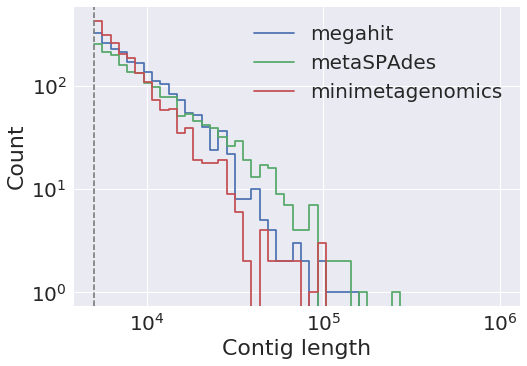

In [90]:
fig = plt.figure()
fg = np.array(a[0][0]);fg =np.append(fg,a[0])
plt.step(a[1],fg,'-')
fg = np.array(b[0][0]);fg =np.append(fg,b[0])
plt.step(b[1],fg,'-')
fg = np.array(c[0][0]);fg =np.append(fg,c[0])
plt.step(c[1],fg,'-')
#plt.step(d[1][1:],d[0])
plt.xscale('log');plt.yscale('log')
sns.set(font_scale = 2)
plt.legend(df['Genome ID'].unique())
plt.axvline(5e3, color='grey', linestyle='--')
plt.xlabel('Contig length')
plt.ylabel('Count')
plt.show()
fig.savefig(subfolder+'/'+expt_name+'/'+expt_name+'_contiglength_per_assemblytype_hist.png')

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


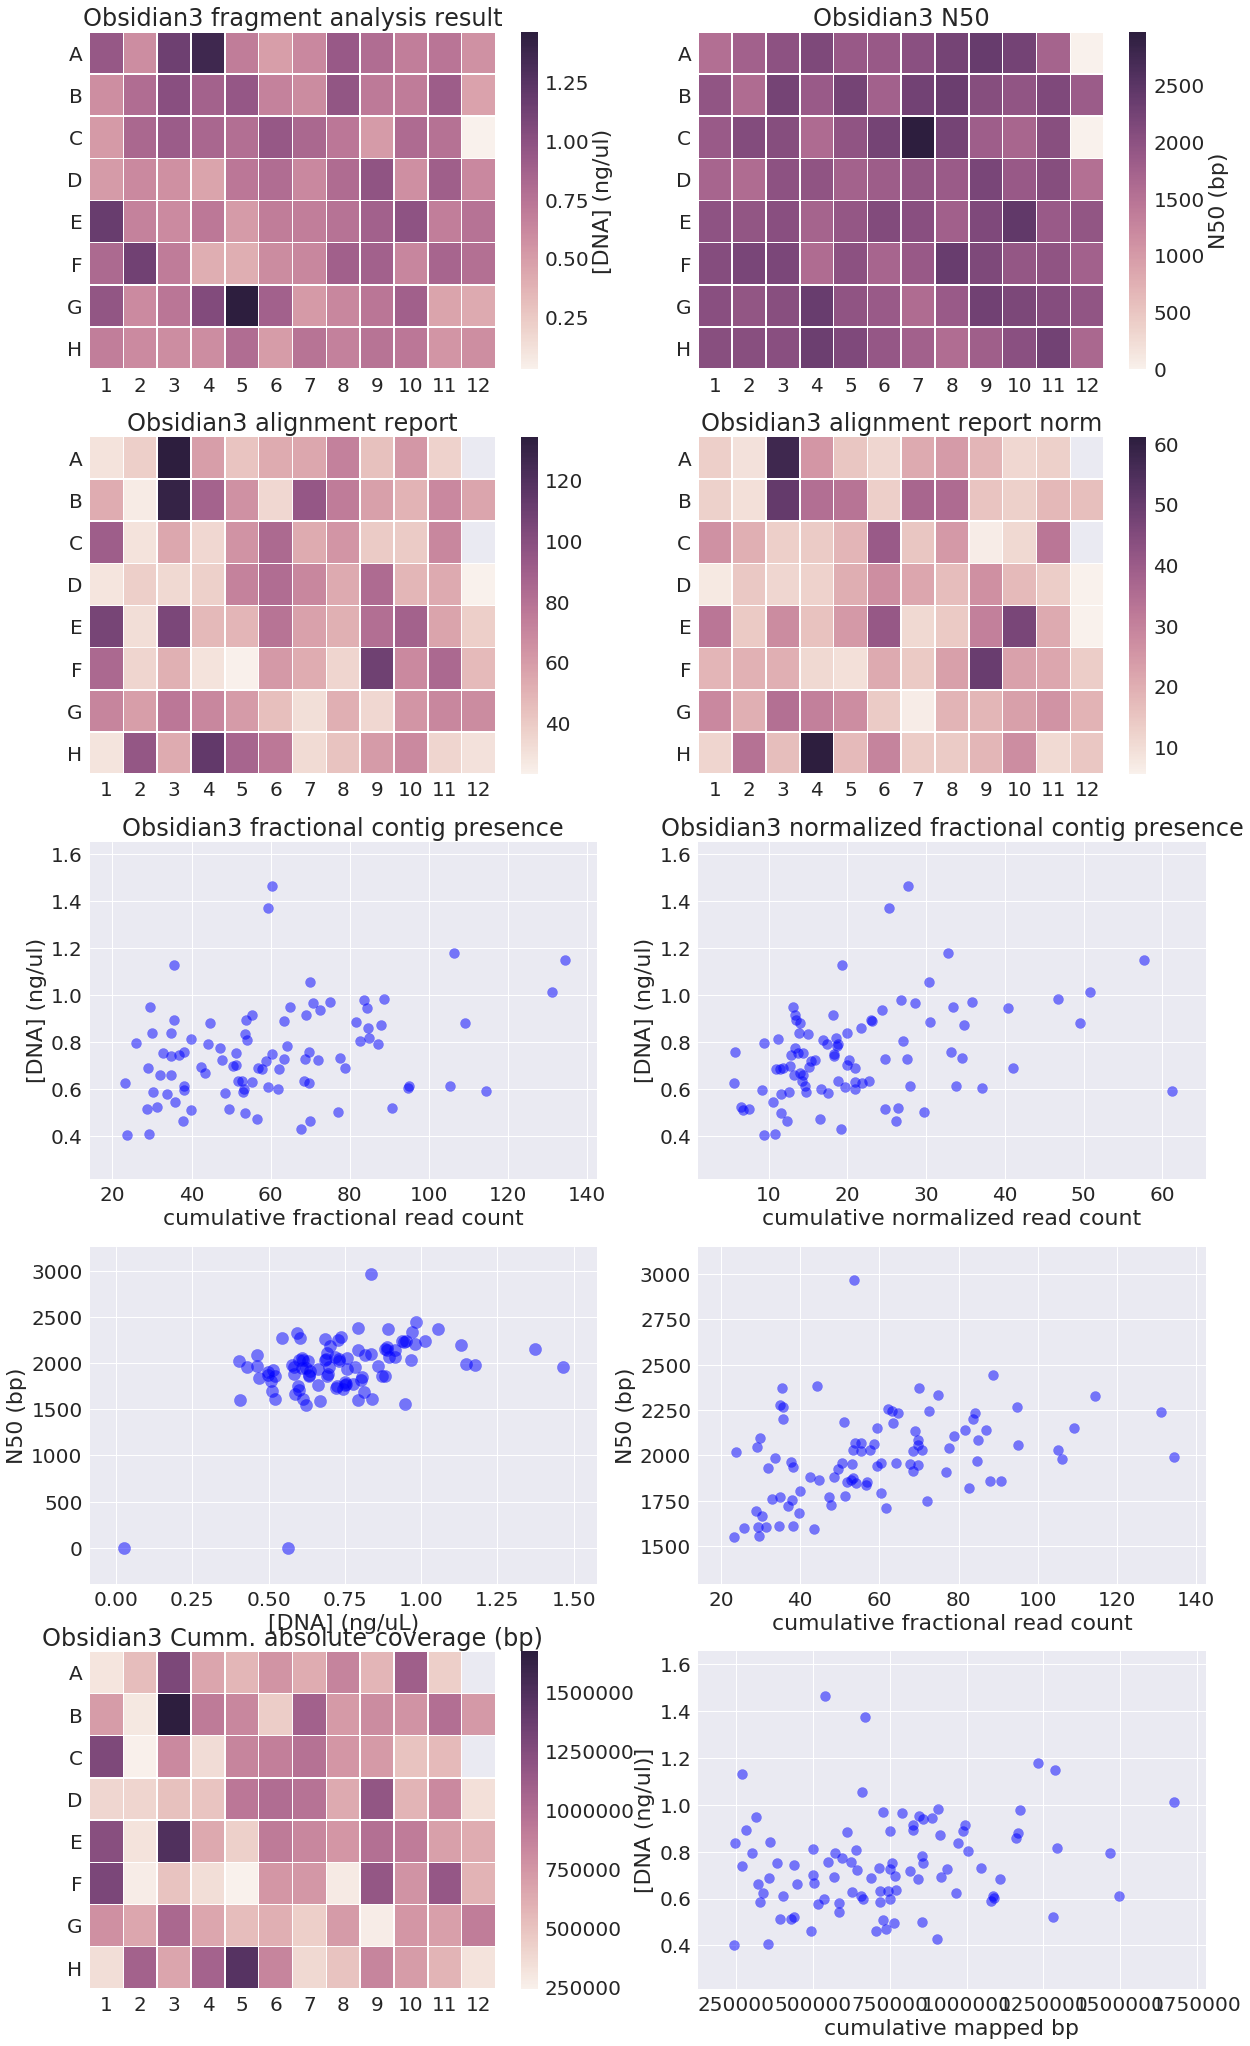

In [91]:
# [DNA] vs. contig presence (assembly report)
#plot the chip as a heat map
f,ax = plt.subplots()

plt.subplot(521)
c = chip_conc.iloc[:,1:]
c = c[c.columns].astype(float)
sns.heatmap(c,linewidths=.5,yticklabels=rows,cbar_kws={'label': '[DNA] (ng/ul)'}) #
sns.set(font_scale = 2)
plt.yticks(rotation=0);plt.xticks(rotation=0)
plt.title(expt_name+' fragment analysis result')
#plt.text(21.5,5,expt_name)

plt.subplot(522)
c = chip_N50.iloc[:,1:]
c = c[c.columns].astype(float)
sns.heatmap(c,linewidths=.5,yticklabels=rows,cbar_kws={'label': 'N50 (bp)'}) #
sns.set(font_scale = 2)
plt.yticks(rotation=0);plt.xticks(rotation=0)
plt.title(expt_name+' N50')

plt.subplot(523)
c = chip.iloc[:,1:]
c = c[c.columns].astype(float)
#cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
#sns.heatmap(c, cmap=cmap, mask=c.isnull())
sns.heatmap(c,linewidths=.5,yticklabels=rows) #
sns.set(font_scale = 2)
plt.yticks(rotation=0);plt.xticks(rotation=0)
plt.title(expt_name+' alignment report')

plt.subplot(524)
c = chip2.iloc[:,1:]
c = c[c.columns].astype(float)
#cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
#sns.heatmap(c, cmap=cmap, mask=c.isnull())
sns.heatmap(c,linewidths=.5,yticklabels=rows) #
sns.set(font_scale = 2)
plt.yticks(rotation=0);plt.xticks(rotation=0)
plt.title(expt_name+' alignment report norm')

plt.subplot(525)
for i in range(1,13):
    plt.scatter(chip[i],chip_conc[i],s=100,c='blue',alpha=0.5)

plt.title(expt_name+' fractional contig presence')
plt.xlabel('cumulative fractional read count')
plt.ylabel('[DNA] (ng/ul)')

plt.subplot(526)
for i in range(1,13):
    plt.scatter(chip2[i],chip_conc[i],s=100,c='blue',alpha=0.5)
plt.title(expt_name+' normalized fractional contig presence')
plt.xlabel('cumulative normalized read count')
plt.ylabel('[DNA] (ng/ul)')    

plt.subplot(527)
for i in range(1,13):
    plt.scatter(chip_conc[i],chip_N50[i],c='blue',s=150,alpha=0.5)
#demux.plot.scatter(x='ng/uL',y='N50')
plt.xlabel('[DNA] (ng/uL)')
plt.ylabel('N50 (bp)')

plt.subplot(528)
for i in range(1,13):
    plt.scatter(chip[i],chip_N50[i],s=100,c='blue',alpha=0.5)
plt.xlabel('cumulative fractional read count')
plt.ylabel('N50 (bp)')

plt.subplot(529)
c = chip_abs.iloc[:,1:]
c = c[c.columns].astype(float)
#cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
#sns.heatmap(c, cmap=cmap, mask=c.isnull())
sns.heatmap(c,linewidths=.5,yticklabels=rows) #
sns.set(font_scale = 2)
plt.yticks(rotation=0);plt.xticks(rotation=0)
plt.title(expt_name+' Cumm. absolute coverage (bp)')


"""plt.subplot(5,2,10)
for i in range(1,13):
    plt.scatter(chip_abs[i],chip_N50[i],s=100,c='blue',alpha=0.5)
plt.xlabel('cumulative mapped bp')
plt.ylabel('N50 (bp)')
"""
plt.subplot(5,2,10)
for i in range(1,13):
    plt.scatter(chip_abs[i],chip_conc[i],s=100,c='blue',alpha=0.5)
plt.xlabel('cumulative mapped bp')
plt.ylabel('[DNA (ng/ul)]')

f.set_figheight(36)
f.set_figwidth(20)
plt.show()

f.savefig(subfolder+'/'+expt_name+'/'+expt_name+'_AssemblyInfo.png')

In [92]:
chip_abs

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,A,313049,537001,1.28816e+06,668538,566467,762716,625515,857509,571594,1.10762e+06,437554,NaN
1,B,716884,301593,1.67422e+06,913266,844076,447501,1.08988e+06,729254,814419,768264,994121,738456
2,C,1.281e+06,247149,825153,360849,855231,887946,972942,749106,728803,500124,548830,NaN
3,D,392936,401169,515184,493810,937608,1.00385e+06,965843,640180,1.17272e+06,585472,826565,338040
4,E,1.23252e+06,320281,1.49602e+06,644581,429182,916460,842354,755569,989409,907903,690085,622343
5,F,1.29603e+06,269091,499218,351666,241339,749689,742955,281779,1.16662e+06,770211,1.16083e+06,593660
6,G,788297,657190,1.04543e+06,658669,537245,609448,438781,717789,267489,750724,704390,902158
7,H,357838,1.0865e+06,664004,1.07897e+06,1.46854e+06,854838,382845,501533,856383,716028,584696,327090


In [93]:
def makeColorScheme(data,bar):
    domlist = ['Bacteria','Archaea','Unassigned','Viruses','Eukaryota']
    barcolortype=sns.color_palette("deep", 10)
    barcolor = []
    if bar == 'YES':
        a = data['Lineage Domain'].value_counts(ascending=True)
    else:
        a = data['Lineage Domain'].value_counts()
    for i in range(0, len(a)):
        for j in range(0,len(domlist)):
            if a.index[i] == domlist[j]:
                barcolor.append(barcolortype[j])
    return(barcolor)

In [94]:
# this gets/sums the contig lengths per domain in a given dataframe, sorted and with names and color code for plotting 
def getLengthList(data):
    outputlist = [];names = [];colnum = [];barcolor = []
    namelist = ['Bacteria','Archaea','Unassigned','Viruses','Eukaryota']
    outputlist.append(data.loc[data['Lineage Domain'] == 'Bacteria', 'Sequence Length'].sum())
    if outputlist[0] != 0:
        names.append(namelist[0])
    outputlist.append(data.loc[data['Lineage Domain'] == 'Archaea', 'Sequence Length'].sum())
    if outputlist[1] != 0:
        names.append(namelist[1])
    outputlist.append(data.loc[data['Lineage Domain'] == 'Unassigned', 'Sequence Length'].sum())
    if outputlist[2] != 0:
        names.append(namelist[2])    
    outputlist.append(data.loc[data['Lineage Domain'] == 'Viruses', 'Sequence Length'].sum())
    if outputlist[3] != 0:
        names.append(namelist[3])
    outputlist.append(data.loc[data['Lineage Domain'] == 'Eukaryota', 'Sequence Length'].sum())
    if outputlist[4] != 0:
        names.append(namelist[4])
    output = np.array(outputlist)
    
    # this is to get the domlist colors the same for every plot 
    barcolortype=sns.color_palette("deep", len(output))
    for k in range(0,len(names)):
        for j in range(0,len(namelist)):
            if names[k] == namelist[j]:
                colnum.append(j)
    for m in colnum:
        barcolor.append(barcolortype[m])                
   
    outputidx = np.where(output!=0)[0]
    output = output[outputidx]
    
    idx = output.argsort()
    output.sort()
    names = list(np.array(names)[idx])
    barcolor = list(np.array(barcolor)[idx])
    return(output,names,barcolor)

In [7]:
# the overall distribution of domains, a barh of phyla (CONTIG COUNT)
from collections import Counter
domlist = ['Bacteria','Archaea','Unassigned','Viruses','Eukaryota']
barcolortype=sns.color_palette("deep", 10)
a = df['Lineage Phylum']
letter_counts = Counter(a)
phyl = pd.DataFrame.from_dict(letter_counts, orient='index')
phyl = phyl.sort_values(by=0,ascending=1)
phyl['dom']= '';k=0
for i in list(phyl.index):
    idx = df.loc[df['Lineage Phylum'] == i]
    phyl.iloc[k,1] = df.iloc[idx.index[0],8]
    k+=1
#phyl.iloc[len(phyl)-1,1] = 'Unassigned'


fig = plt.figure()

gs = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0,0])
barcolorspie = makeColorScheme(df,'No')
df['Lineage Domain'].value_counts().plot(kind='pie',legend=False,colors=barcolorspie)
plt.title('Number of contigs '+expt_name)
ax1.set_ylabel('')


ax2 = fig.add_subplot(gs[1,0])
barcolorsdom = makeColorScheme(df,'YES')
df['Lineage Domain'].value_counts(ascending=True).plot(kind='barh',logx=True,color=barcolorsdom)
ax2.set_xlim(1,1e4)

ax3 = fig.add_subplot(gs[:, 1])
barcolors = []
for i in range(0, len(phyl)):
    for j in range(0,len(domlist)):
        if phyl.iloc[i,1] == domlist[j]:
            barcolors.append(barcolortype[j])

phyl.plot(kind='barh',legend=False,logx=True,color=[barcolors],ax=ax3)

gs.update(wspace=1.20, hspace=0.1)

fig = plt.gcf()

#plotly_fig = tls.mpl_to_plotly( fig )
#plotly_fig['layout']['title'] = 'Subplots with variable widths and heights'

plt.title(expt_name)
fig.set_figheight(16)
fig.set_figwidth(20)
plt.show()

fig.savefig(subfolder+'/'+expt_name+'/'+expt_name+'_overviewDomainPhylum.png')

NameError: name 'df' is not defined

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


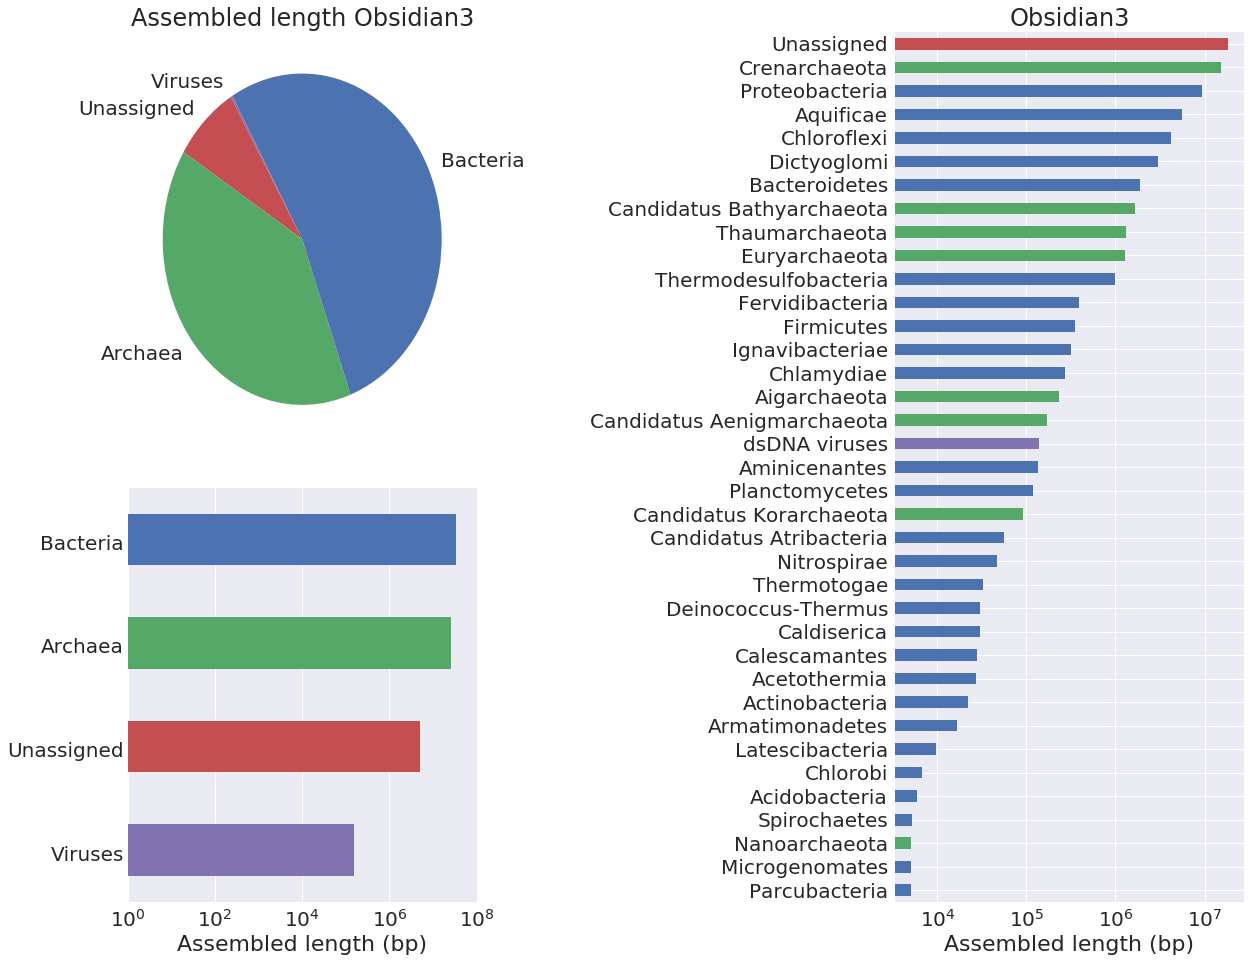

In [96]:
# the overall distribution of domains, a barh of phyla (ASSEMBLED LENGTH COUNT)
a = df['Lineage Phylum']
letter_counts = Counter(a)
phyl = pd.DataFrame.from_dict(letter_counts, orient='index')
#phyl = phyl.sort_values(by=0,ascending=1)
phyl['dom']= '';k=0
for i in list(phyl.index):
    idx = df.loc[df['Lineage Phylum'] == i]
    phyl.iloc[k,1] = df.iloc[idx.index[0],8]
    phyl.iloc[k,0] = df.loc[df['Lineage Phylum'] == i, 'Sequence Length'].sum()
    k+=1
phyl = phyl.sort_values(by=0,ascending=1)
#phyl.iloc[len(phyl)-1,1] = 'Unassigned'


fig = plt.figure()

gs = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0,0])
#barcolorspie = makeColorScheme(df,'No')
#df['Lineage Domain'].value_counts().plot(kind='pie',legend=False,colors=barcolorspie)
dflengths,labels,barcolor = getLengthList(df)
plt.pie(dflengths,startangle=120,labels=labels,colors=barcolor)
plt.title('Assembled length '+expt_name)
#plt.ylabel('')
#ax1.set_ylabel('')


ax2 = fig.add_subplot(gs[1,0])
barcolorsdom = makeColorScheme(df,'YES')
a= df.groupby('Lineage Domain')['Sequence Length'].sum().reset_index()
a = a.sort_values('Sequence Length').reset_index()
ax = a.iloc[:,2].plot(kind='barh',legend=False,logx=True,color=barcolorsdom,figsize=(21,14))
for i, x in enumerate(a['Lineage Domain']):
    ax.text(0.81,i-.1 , x, ha='right',fontsize='small')
plt.yticks([])
plt.xlabel('Assembled length (bp)')
#b= [max(a['Sequence Length'])*2]

#df['Lineage Domain'].value_counts(ascending=True).plot(kind='barh',logx=True,color=barcolorsdom)
ax2.set_xlim(1,1e8)

ax3 = fig.add_subplot(gs[:, 1])
barcolors = []
for i in range(0, len(phyl)):
    for j in range(0,len(domlist)):
        if phyl.iloc[i,1] == domlist[j]:
            barcolors.append(barcolortype[j])

phyl.plot(kind='barh',legend=False,logx=True,color=[barcolors],ax=ax3)
plt.xlabel('Assembled length (bp)')
gs.update(wspace=1.20, hspace=0.1)

fig = plt.gcf()

#plotly_fig = tls.mpl_to_plotly( fig )
#plotly_fig['layout']['title'] = 'Subplots with variable widths and heights'

plt.title(expt_name)
fig.set_figheight(16)
fig.set_figwidth(20)
plt.show()

fig.savefig(subfolder+'/'+expt_name+'/'+expt_name+'_overviewDomainPhylum_length.png')

In [9]:
phyl

NameError: name 'phyl' is not defined

In [97]:
#Save the phylum rank df to pickle
phyl.to_pickle(expt_name+'_phyla')

In [98]:
mh = df[df['Genome ID'].str.contains("megahit")]
mS = df[df['Genome ID'].str.contains("metaSPAdes")]
mm = df[df['Genome ID'].str.contains("minimetagenomics")]
mh.to_pickle(expt_name+'megahit_maindf')
mS.to_pickle(expt_name+'metaSpades_maindf')
mm.to_pickle(expt_name+'minimeta_maindf')
df.to_pickle(expt_name+'All_maindf')

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


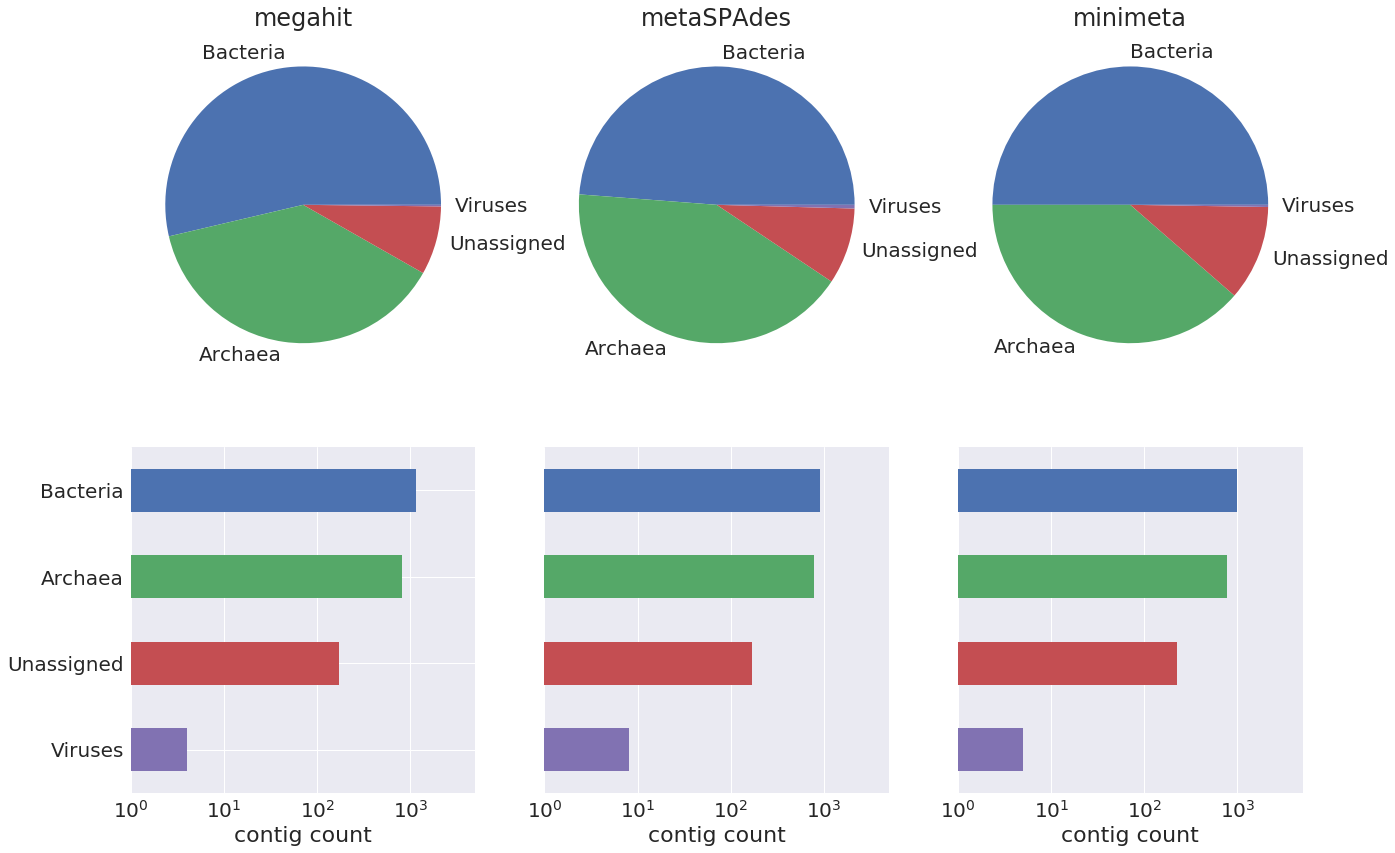

In [99]:
# the domain distribution for assembly types: does any method pick up on different things?
f,ax = plt.subplots()

plt.subplot(231)
barcolorspie = makeColorScheme(mh,'No')
mh['Lineage Domain'].value_counts().plot(kind='pie',legend=False,colors=barcolorspie)
plt.ylabel('')
plt.title('megahit')

plt.subplot(232)
barcolorspie = makeColorScheme(mS,'No')
mS['Lineage Domain'].value_counts().plot(kind='pie',legend=False,colors=barcolorspie)
plt.ylabel('')
plt.title('metaSPAdes')

plt.subplot(233)
barcolorspie = makeColorScheme(mm,'No')
mm['Lineage Domain'].value_counts().plot(kind='pie',figsize=(21,14),legend=False,colors=barcolorspie)
plt.ylabel('')
plt.title('minimeta')

plt.subplot(234)
ax2 = fig.add_subplot(gs[1,0])
barcolorsdom = makeColorScheme(mh,'YES')
mh['Lineage Domain'].value_counts(ascending=True).plot(kind='barh',legend=False,logx=True,color=barcolorsdom)
plt.xlabel('contig count')
plt.xlim(1,5e3)

plt.subplot(235)
ax2 = fig.add_subplot(gs[1,0])
barcolorsdom = makeColorScheme(mS,'YES')
mS['Lineage Domain'].value_counts(ascending=True).plot(kind='barh',logx=True,color=barcolorsdom)
plt.yticks([])
plt.xlim(1,5e3)
plt.xlabel('contig count')

plt.subplot(236)
ax2 = fig.add_subplot(gs[1,0])
barcolorsdom = makeColorScheme(mm,'YES')
mm['Lineage Domain'].value_counts(ascending=True).plot(kind='barh',figsize=(21,14),legend=False,logx=True,color=barcolorsdom)
plt.yticks([])
plt.xlim(1,5e3)
plt.xlabel('contig count')
plt.show()


f.savefig(subfolder+'/'+expt_name+'/'+expt_name+'_assemblyType.png')

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


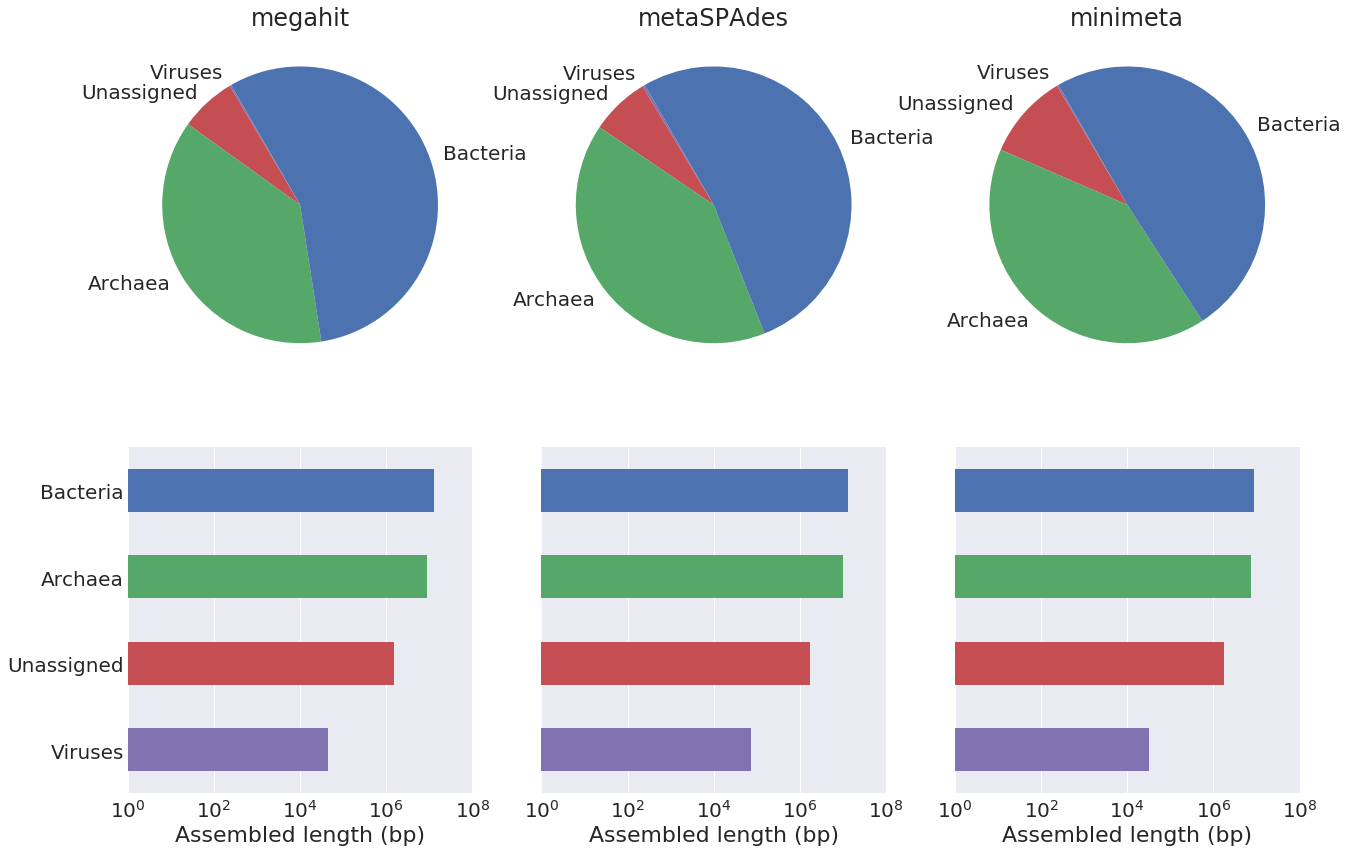

In [100]:
# the domain distribution for assembly types BY LENGTH: does any method pick up on different things?
f,ax = plt.subplots()

plt.subplot(231)
mhlengths,labels,barcolor = getLengthList(mh)
plt.pie(mhlengths,startangle=120,labels=labels,colors=barcolor)
plt.ylabel('')
plt.title('megahit')

plt.subplot(232)
mSlengths,labels,barcolor = getLengthList(mS)
plt.pie(mSlengths,startangle=120,labels=labels,colors=barcolor)
plt.ylabel('')
plt.title('metaSPAdes')

plt.subplot(233)
mmlengths,labels,barcolor = getLengthList(mm)
plt.pie(mmlengths,startangle=120,labels=labels,colors=barcolor)
plt.ylabel('')
plt.title('minimeta')

plt.subplot(234)
ax2 = fig.add_subplot(gs[1,0])
barcolorsdom = makeColorScheme(mh,'YES')
a= mh.groupby('Lineage Domain')['Sequence Length'].sum().reset_index()
a = a.sort_values('Sequence Length').reset_index()
ax = a.iloc[:,2].plot(kind='barh',legend=False,logx=True,color=barcolorsdom,figsize=(21,14))
for i, x in enumerate(a['Lineage Domain']):
    ax.text(0.81,i-.1 , x, ha='right',fontsize='small')
plt.yticks([])
plt.xlabel('Assembled length (bp)')
#b= [max(a['Sequence Length'])*2]
#plt.xlim(1,b[0])
plt.xlim(1,1e8)

plt.subplot(235)
ax2 = fig.add_subplot(gs[1,0])
barcolorsdom = makeColorScheme(mS,'YES')
a= mS.groupby('Lineage Domain')['Sequence Length'].sum().reset_index()
a = a.sort_values('Sequence Length').reset_index()
ax = a.iloc[:,2].plot(kind='barh',legend=False,logx=True,color=barcolorsdom,figsize=(21,14))
#for i, x in enumerate(a['Lineage Domain']):
#    ax.text(0.81,i-.1 , x, ha='right',fontsize='small')
plt.yticks([])
#b= [max(a['Sequence Length'])*2]
#plt.xlim(1,b[0])
plt.xlim(1,1e8)
plt.xlabel('Assembled length (bp)')

plt.subplot(236)
ax2 = f.add_subplot()

barcolorsdom = makeColorScheme(mm,'YES')
a= mm.groupby('Lineage Domain')['Sequence Length'].sum().reset_index()
a = a.sort_values('Sequence Length').reset_index()
ax = a.iloc[:,2].plot(kind='barh',legend=False,logx=True,color=barcolorsdom,figsize=(21,14))
#for i, x in enumerate(a['Lineage Domain']):
#    ax.text(0.81,i-.1 , x, ha='right',fontsize='small')
plt.yticks([])
#b= [max(a['Sequence Length'])*2]
#plt.xlim(1,b[0])
plt.xlim(1,1e8)
plt.xlabel('Assembled length (bp)')
plt.show()


f.savefig(subfolder+'/'+expt_name+'/'+expt_name+'_assemblyType_length.png')

In [57]:
# plot all the phyla in minimeta contigs
#phylum_abundance = plotallphyla(df,'Lineage Phylum','include')

In [59]:
#phylum_abundance.to_pickle(expt_name+'phylumdf_all')

In [258]:
"""a = df[df['Lineage Species'].str.contains('populeti')]   #'[Clostridium] populeti')] #this was giving an error message
a["Lineage Species"]

a = df.loc[df['Lineage Species'].str.contains('populeti')]
a.index[0]
#df.iloc[a.index[0],14] = 'Clostridium populeti'
df.iloc[a.index[0],14]"""

'Clostridium populeti'

In [60]:
# plot all the species in minimeta contigs 
#species_abundance = plotallphyla(df,'Lineage Species','include')

In [ ]:
#phylum_abundance.to_pickle(expt_name+'speciesdf_all')

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


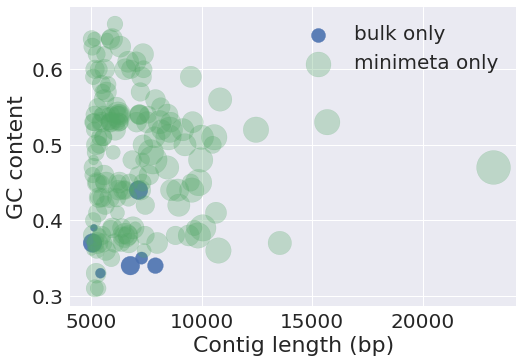

In [101]:
# phyla not in minimeta but in bulk
allphyla = df['Lineage Phylum'].unique()
bulk = selectNotMinimeta(df)
allphyla_bulk = bulk['Lineage Phylum'].unique()
mini = selectMinimeta(df)
allphyla_mini = mini['Lineage Phylum'].unique()

not_in_mini = np.setdiff1d(allphyla,allphyla_mini)
not_in_bulk = np.setdiff1d(allphyla,allphyla_bulk)

df_not_mini = df[df['Lineage Phylum'].str.contains(not_in_mini[0])]
for i in range(1,len(not_in_mini)):
    a = df[df['Lineage Phylum'].str.contains(not_in_mini[i])]
    df_not_mini = df_not_mini.append(a)

df_not_bulk = df[df['Lineage Phylum'].str.contains(not_in_bulk[0])]
for i in range(1,len(not_in_bulk)):
    a = df[df['Lineage Phylum'].str.contains(not_in_bulk[i])]
    df_not_bulk = df_not_bulk.append(a)    


    
plt.scatter(df_not_mini['Sequence Length'],df_not_mini['GC Content'],alpha=0.9,s=df_not_mini['Gene Count']*50)
plt.scatter(df_not_bulk['Sequence Length'],df_not_bulk['GC Content'],alpha=0.3,s=df_not_bulk['Gene Count']*50)
#plt.xscale('log')
#plt.xlim(3e3,1e4)
plt.legend(['bulk only','minimeta only'])
plt.ylabel('GC content')
plt.xlabel('Contig length (bp)')
plt.show()

In [102]:
# this is for input dataframe in the format of the main dataframe
def getrankedsummedlength(data,title):
    domlist = ['Bacteria','Archaea','Unassigned','Viruses','Eukaryota']
    a = data['Lineage Phylum']
    letter_counts = Counter(a)
    phyl = pd.DataFrame.from_dict(letter_counts, orient='index')
    #phyl = phyl.sort_values(by=0,ascending=1)
    phyl['dom']= '';k=0
    for i in list(phyl.index):
        idx = data.loc[data['Lineage Phylum'] == i]
        phyl.iloc[k,1] = data.loc[idx.index[0]][8]
        phyl.iloc[k,0] = data.loc[data['Lineage Phylum'] == i, 'Sequence Length'].sum()
        k+=1
    phyl = phyl.sort_values(by=0,ascending=1)

    
    barcolortype=sns.color_palette("deep", 10)
    
    barcolor = [];colnum = []

    # this is to get the domlist colors the same for every plot 
    for k in range(0,len(phyl)):
        for j in range(0,len(domlist)):
            if phyl.iloc[k,1] == domlist[j]:
                colnum.append(j)
                
    for m in colnum:
        barcolor.append(barcolortype[m])   
    
    
    
    fig = plt.figure()
    gs = gridspec.GridSpec(1, 4)


    ax1 = fig.add_subplot(gs[0,1:])
    phyl.plot(kind='barh',legend=False,color=[barcolor],ax=ax1)
    plt.xlabel('Assembled length (bp)')
    plt.title(title)
    plt.show()
    fig.set_figwidth(12)
    fig.savefig(subfolder+'/'+expt_name+'/'+expt_name+'_'+title+'.png')
    
    
    return(phyl)

In [103]:
df[df['Lineage Phylum'].str.contains(not_in_mini[1])]

,Scaffold ID,Scaffold Name,Genome ID,Genome,Gene Count,Sequence Length,GC Content,Read Depth,Lineage Domain,Lineage Phylum,...,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12
388,3300017562 assembled Ga0186926,10389,megahit,Hotspring sediment microbial communities from ...,7,6763,0.34,1,Bacteria,Chlorobi,...,0,0,0,0,0,0,0,0,0,0


In [104]:
np.setdiff1d(allphyla,allphyla_mini)

array(['Calescamantes', 'Chlorobi', 'Nanoarchaeota', 'Parcubacteria'], dtype=object)

In [105]:
np.setdiff1d(allphyla,allphyla_bulk)

array(['Acetothermia', 'Acidobacteria', 'Aminicenantes', 'Armatimonadetes',
       'Candidatus Atribacteria', 'Candidatus Korarchaeota', 'Chlamydiae',
       'Fervidibacteria', 'Latescibacteria', 'Microgenomates',
       'Planctomycetes', 'Spirochaetes'], dtype=object)

In [106]:
not_in_bulk


array(['Acetothermia', 'Acidobacteria', 'Aminicenantes', 'Armatimonadetes',
       'Candidatus Atribacteria', 'Candidatus Korarchaeota', 'Chlamydiae',
       'Fervidibacteria', 'Latescibacteria', 'Microgenomates',
       'Planctomycetes', 'Spirochaetes'], dtype=object)

In [107]:
df_not_bulk

,Scaffold ID,Scaffold Name,Genome ID,Genome,Gene Count,Sequence Length,GC Content,Read Depth,Lineage Domain,Lineage Phylum,...,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12
4917,3300017562 assembled Ga0186926,14918,minimetagenomics,Hotspring sediment microbial communities from ...,8,7270,0.59,1,Bacteria,Acetothermia,...,0,0,0.0330124,0.00618982,0,0.00660248,0,0.178267,0,0
4927,3300017562 assembled Ga0186926,14928,minimetagenomics,Hotspring sediment microbial communities from ...,7,7215,0.57,1,Bacteria,Acetothermia,...,0,0,0,0,0,0.0321552,0,0.107277,0,0
4977,3300017562 assembled Ga0186926,14978,minimetagenomics,Hotspring sediment microbial communities from ...,8,7025,0.61,1,Bacteria,Acetothermia,...,0,0,0,0,0,0.0674733,0,0,0,0
5741,3300017562 assembled Ga0186926,15742,minimetagenomics,Hotspring sediment microbial communities from ...,6,5331,0.60,1,Bacteria,Acetothermia,...,0,0,0,0,0,0.27537,0,0.740011,0,0
5450,3300017562 assembled Ga0186926,15451,minimetagenomics,Hotspring sediment microbial communities from ...,5,5838,0.53,1,Bacteria,Acidobacteria,...,0,0,0,0,0,0,0,0,0.00393971,0
4084,3300017562 assembled Ga0186926,14085,minimetagenomics,Hotspring sediment microbial communities from ...,23,23217,0.47,1,Bacteria,Aminicenantes,...,0,0.0235173,0.00555627,0.00607314,0.0280398,0,0.00822673,0.223414,0.00534091,0.0096481
4505,3300017562 assembled Ga0186926,14506,minimetagenomics,Hotspring sediment microbial communities from ...,6,9499,0.45,1,Bacteria,Aminicenantes,...,0,0,0,0,0,0,0.0101063,0,0,0
4799,3300017562 assembled Ga0186926,14800,minimetagenomics,Hotspring sediment microbial communities from ...,16,7787,0.48,1,Bacteria,Aminicenantes,...,0,0,0,0.0193913,0,0,0,0.589572,0,0
4833,3300017562 assembled Ga0186926,14834,minimetagenomics,Hotspring sediment microbial communities from ...,8,7603,0.46,1,Bacteria,Aminicenantes,...,0,0,0,0,0,0,0,0.257398,0,0
4867,3300017562 assembled Ga0186926,14868,minimetagenomics,Hotspring sediment microbial communities from ...,7,7440,0.42,1,Bacteria,Aminicenantes,...,0,0,0,0,0,0,0,0.00268817,0,0


/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


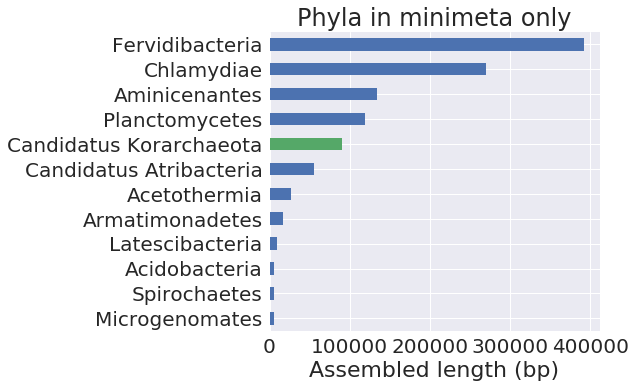

In [114]:
a=getrankedsummedlength(df_not_bulk,'Phyla in minimeta only')
a.to_pickle(expt_name+'Phyla in minimeta only')

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


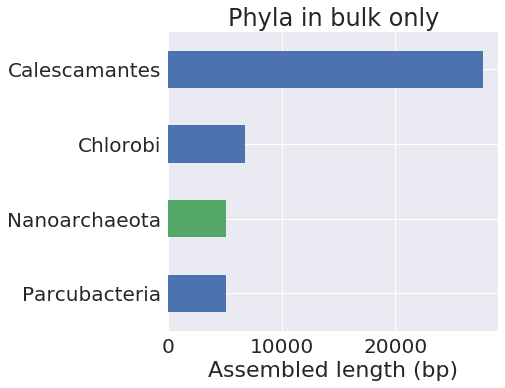

In [113]:
a= getrankedsummedlength(df_not_mini,'Phyla in bulk only')
a.to_pickle(expt_name+'Phyla in bulk only')

In [ ]:
################################################################
################################################################
################## Load and process COG ########################
################################################################
################################################################

In [25]:
#COGfun = list((open('COGreffiles/fun2003-2014.tab')))
COGfun = pd.read_table('COGreffiles/fun2003-2014.tab')
COGnames = pd.read_table('COGreffiles/cognames2003-2014.tab')
COGexpt = list(csv.reader(open('/home/datastorage/Obsidian_annotationData_5kb/'+shorthand+'/IMG Data/'+numstr+'.assembled.COG')))
COGdf = pd.DataFrame.from_records(COGexpt,columns=['assembly','contig','COG','percent','length','start','end','bla','bli','some number','another'])

In [46]:
COGassembly = COGdf.iloc[:,0:7]
COGassembly['name'] = '';COGassembly['function'] = '';
for i in range(0,max(COGnames['func'].str.len())):
    COGassembly['cluster'+str(i)] = ''

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [48]:
import time
start_time = time.time()
for i in range(0,len(COGassembly['COG'])):
    if COGnames['COG'].str.contains(COGassembly.iloc[i,2]).any():
        idx = COGnames.loc[COGnames['COG'] == COGassembly.iloc[i,2]] # COG names index search
        COGassembly.iloc[i,7] = COGnames.iloc[idx.index[0],2] # add name
        COGassembly.iloc[i,8] = COGnames.iloc[idx.index[0],1] # add function cluster letter
        for j in range(0,len(COGassembly.iloc[i,8])):
            idx = COGfun.loc[COGfun['# Code'] == COGassembly.iloc[i,8][j]] # cluster file index search
            COGassembly.iloc[i,9+j] = COGfun.iloc[idx.index[0],1] # adding cluster
end_time = time.time()            
print('Clustering took {:.2f} s'.format(end_time - start_time))
COGassembly.to_pickle(expt_name+'_COGassembly_All')

Clustering took 204.77 s


In [50]:
# this is searching for a specific string 
#ghb = COGassembly[COGassembly.contig.str.contains('10002')].index

# this is searching for all the elements in subset
ghb = []
IDlist = list(subset['Scaffold Name']) # contig numbers
for i in IDlist:
    ghb.append(list(COGassembly[COGassembly.contig.str.contains(str(i))].index))

ghb = [item for sublist in ghb for item in sublist]
ghb2 = COGassembly.function.loc[ghb]
ghb3 = []
for i in ghb2:
    for j in range(0,len(i)):
        ghb3.append(i[j])
ghb4 = Counter(ghb3)
ghb5 = pd.DataFrame.from_dict(ghb4, orient='index')
ghb5 = ghb5.sort_values(by=0,ascending=1)
#palette = sns.color_palette('GnBu_d', len(COGfun))
#palette = sns.color_palette('cubehelix', len(COGfun))
palette = sns.diverging_palette(10, 220, l=59, n=len(ghb5), center="light")
wedgecolor = [];leg = []
for i in range(0,len(ghb5)):
    wedgecolor.append(palette[i])
    for j in range(0,len(COGfun)):
        if COGfun.iloc[j,0] == ghb5.index[i]:
            #leg.append(COGfun.iloc[j,0]+': '+COGfun.iloc[j,1]) # use for pie
            leg.append(COGfun.iloc[j,1]) #use for barh
            
#ghb5[0].plot(kind='pie',colors=wedgecolor)#, labels=None)
ghb5[0].plot(kind='barh')
for i, x in enumerate(leg):
    plt.text(-0.1,i-0.3 , x, ha='right',fontsize='small')
#plt.legend(leg,bbox_to_anchor=(1.05, 0.95), loc=2)
plt.xlabel('number of contigs')
plt.yticks([])
plt.show()

NameError: name 'subset' is not defined

In [120]:
#COGfun = pd.read_table('COGreffiles/fun2003-2014.tab')
#COGassembly = pd.read_pickle(expt_name+'_COGassembly_All')
COGassembly['contig'] = COGassembly['contig'].astype(str)


# make selection from df based on function capital letter
def getDFfromCOGfunct(dataframe,COGdf,functiongroup,groupnamedf):
    # groupnamedf is the dataframe called 'COGfun' loaded above
    
    start_time = time.time()
    # subset that contains e.g. 'defense mechanisms' (V)
    defensedf = COGdf[COGdf['function'].str.contains(functiongroup)]
    idx = groupnamedf.loc[groupnamedf['# Code'] == functiongroup]
    title = groupnamedf.iloc[idx.index[0],1]

    # look where on the tSNE these occur
    sublist = []
    for i in range(0,len(defensedf)):
        sublist.append(defensedf.iloc[i,1][0:5])
    listcount = Counter(sublist) # histogram of contig occurrence 
    numcontigs = len(listcount) # number of contigs having the selected function
    contigsubset = pd.DataFrame.from_dict(listcount, orient='index')
    contigsubset = contigsubset.sort_values(by=0,ascending=1) # stuff in sorted dataframe
    intlist = contigsubset.index.astype(int)

    maindfselection = dataframe[dataframe['Scaffold Name'] == intlist[0]]
    dfjoiner = pd.DataFrame([0],columns=['funct_occurence'])
    dfjoiner.iloc[0,0] = contigsubset.iloc[0,0];k=0
    for i in range(1,len(intlist)):
        if (len(dataframe[dataframe.isin([intlist[i]]).any(1)]) > 0):
            maindfselection = maindfselection.append(dataframe[dataframe['Scaffold Name'] == intlist[i]])
        else:
            k+=1
    end_time = time.time()
    if (len(maindfselection) > 0):
        fig = plt.figure()
        gs = gridspec.GridSpec(1, 1)


        ax1 = fig.add_subplot(gs[0,0])
        dataframe.plot.scatter(x='k5_x',y='k5_y',alpha=0.5,ax=ax1)
        maindfselection.plot.scatter(x='k5_x',y='k5_y',ax=ax1,color='red',alpha=0.5)
        plt.title(title,fontsize=14)
        plt.show()
        fig.savefig(subfolder+'/'+expt_name+'/'+expt_name+'_minimeta_'+title+'.png')
    print('Clustering took {:.2f} s'.format(end_time - start_time))
    print(str(len(intlist)-k)+' out of '+str(len(intlist))+' contigs with selected function in selected dataframe')
    return(maindfselection,k)

# make selection from df based on partial or complete occurrence of search string in enzyme/gene name
def getDFfromCOGgene(dataframe,COGdf,genename,groupnamedf):
    # groupnamedf is the dataframe called 'COGfun' loaded above
    
    start_time = time.time()
    # subset that contains e.g. 'defense mechanisms' (V)
    defensedf = COGdf[COGdf['name'].str.contains(genename)]
    #idx = groupnamedf.loc[groupnamedf['# Code'] == functiongroup]
    title = genename

    # look where on the tSNE these occur
    sublist = []
    for i in range(0,len(defensedf)):
        sublist.append(defensedf.iloc[i,1][0:5])
    listcount = Counter(sublist) # histogram of contig occurrence 
    numcontigs = len(listcount) # number of contigs having the selected function
    contigsubset = pd.DataFrame.from_dict(listcount, orient='index')
    contigsubset = contigsubset.sort_values(by=0,ascending=1) # stuff in sorted dataframe
    intlist = contigsubset.index.astype(int)

    maindfselection = dataframe[dataframe['Scaffold Name'] == intlist[0]]
    dfjoiner = pd.DataFrame([0],columns=['funct_occurence'])
    dfjoiner.iloc[0,0] = contigsubset.iloc[0,0];k=0
    for i in range(1,len(intlist)):
        if (len(dataframe[dataframe.isin([intlist[i]]).any(1)]) > 0):
            maindfselection = maindfselection.append(dataframe[dataframe['Scaffold Name'] == intlist[i]])
        else:
            k+=1
    end_time = time.time()
    if (len(maindfselection) > 0):
        fig = plt.figure()
        gs = gridspec.GridSpec(1, 1)


        ax1 = fig.add_subplot(gs[0,0])
        dataframe.plot.scatter(x='k5_x',y='k5_y',alpha=0.5,ax=ax1)
        maindfselection.plot.scatter(x='k5_x',y='k5_y',ax=ax1,color='red',alpha=0.5)
        plt.title(title,fontsize=14)
        plt.show()
        fig.savefig(subfolder+'/'+expt_name+'/'+expt_name+'_minimeta_'+title+'.png')
    print('Clustering took {:.2f} s'.format(end_time - start_time))
    print(str(len(intlist)-k)+' out of '+str(len(intlist))+' contigs with selected function in selected dataframe')
    return(maindfselection,defensedf)

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


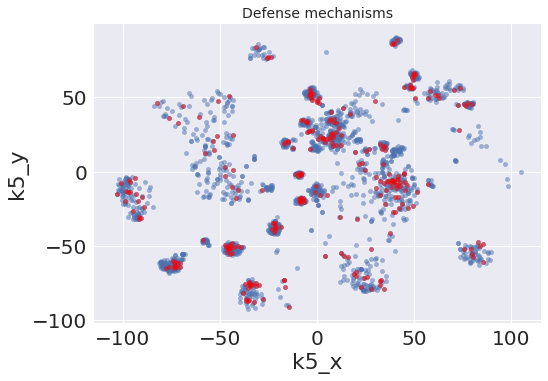

Clustering took 18.21 s
330 out of 977 contigs with selected function in selected dataframe


In [121]:
#search for a function class
vb,vv = getDFfromCOGfunct(mm,COGassembly,'V',COGfun)


/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


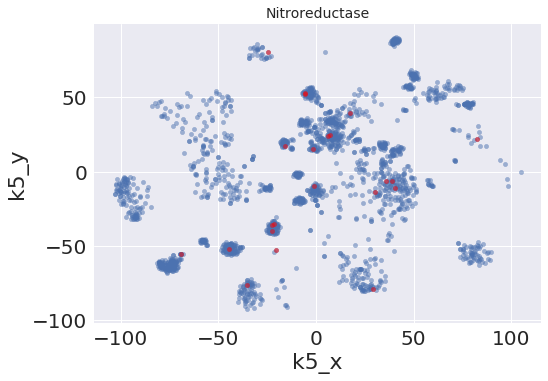

Clustering took 1.30 s
27 out of 72 contigs with selected function in selected dataframe


In [122]:
#search for a complete search term
vb2,vv2 = getDFfromCOGgene(mm,COGassembly,'Nitroreductase',COGfun)

/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


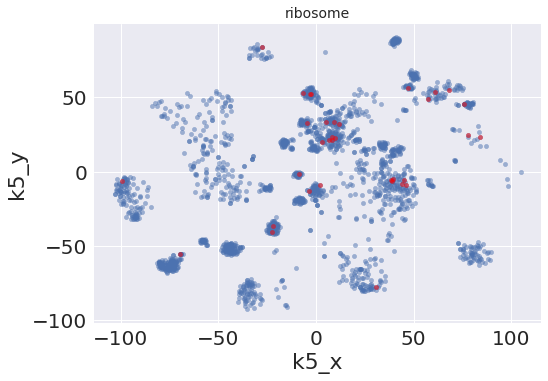

Clustering took 2.15 s
39 out of 117 contigs with selected function in selected dataframe


In [123]:
#search for a partial string
vb2,vv2 = getDFfromCOGgene(mm,COGassembly,'ribosome',COGfun)